In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
from matplotlib import rcParams
import seaborn as sns

rcParams['font.sans-serif'] = "Arial"
rcParams['font.family'] = "Arial"
mpl.rcParams['figure.dpi']= 300
plt.rcParams['font.size'] = 8
sns.set(font="Arial", style = 'white')
from matplotlib import font_manager
from scipy.stats import permutation_test
# sorted(font_manager.get_font_names())
import joblib

# Time Series Explanation

In the following chart or code, the red and blue represent different time series from distinct body parts:

- **Red**: Represents the **brain's time series**  
- **Blue**: Represents the **spinal cord's time series**


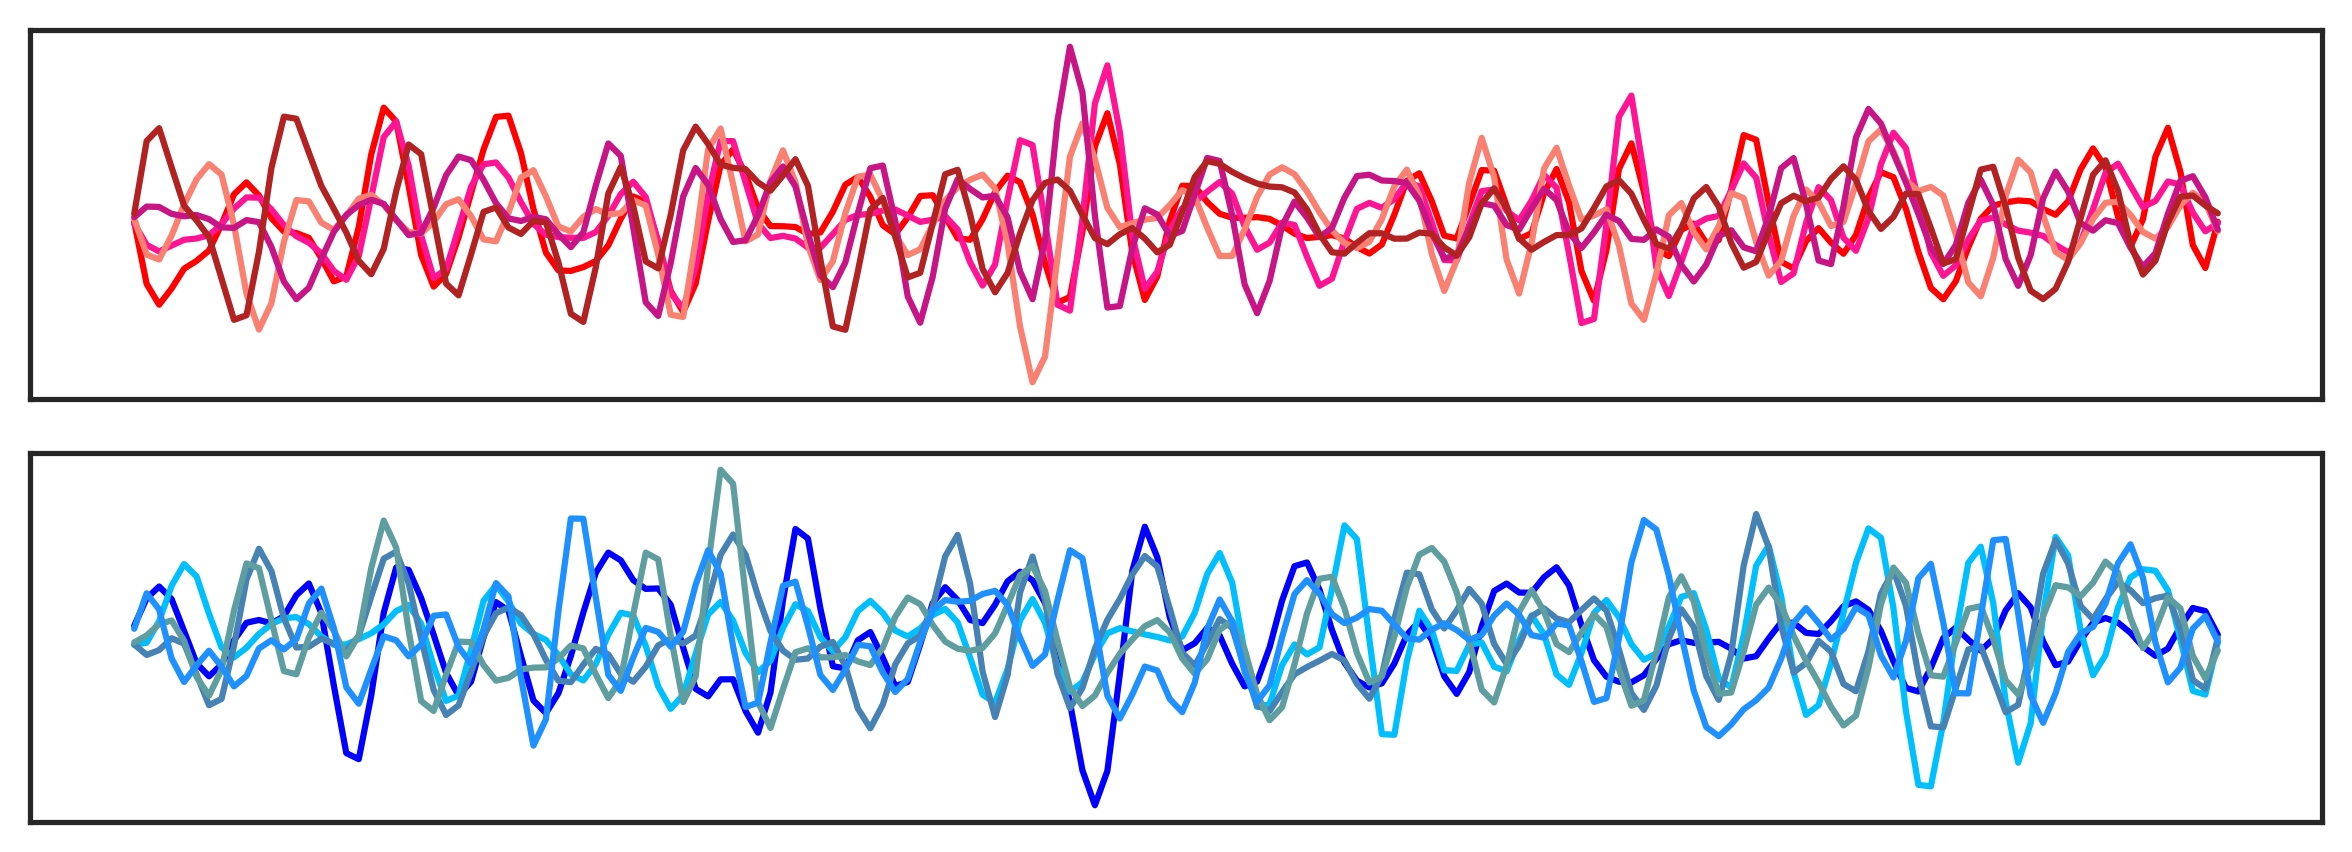

In [2]:
brain_time_series = np.load('/home/lxm/lxm/post_braincord/scripts/5post_stats/1_all_analysis/validation_b_bs/final/sample_ts.npy')
colors = ['red', 'deeppink', 'salmon', 'mediumvioletred', 'firebrick']  # List of red-related colors
inds = [22, 33, 44, 55, 66]
colors2 = ['blue', 'deepskyblue', 'steelblue', 'cadetblue', 'dodgerblue']  # Blue-related color palette
inds2 = [78, 89, 90, 91, 92]

fig,ax=plt.subplots(2,1,figsize=(8,3))
for i in range(5):
    ax[0].plot(brain_time_series[:, inds[i] ],color=colors[i])
    ax[1].plot(brain_time_series[:, inds2[i] ],color=colors2[i])
for a in ax:
    a.spines['top'].set_visible(True)
    a.spines['right'].set_visible(True)
    a.spines['bottom'].set_visible(True)
    a.spines['left'].set_visible(True)
    a.set_yticks([])
    a.set_xticks([])

# Set the spacing between subplots to zero
plt.subplots_adjust(hspace=0)


plt.tight_layout()

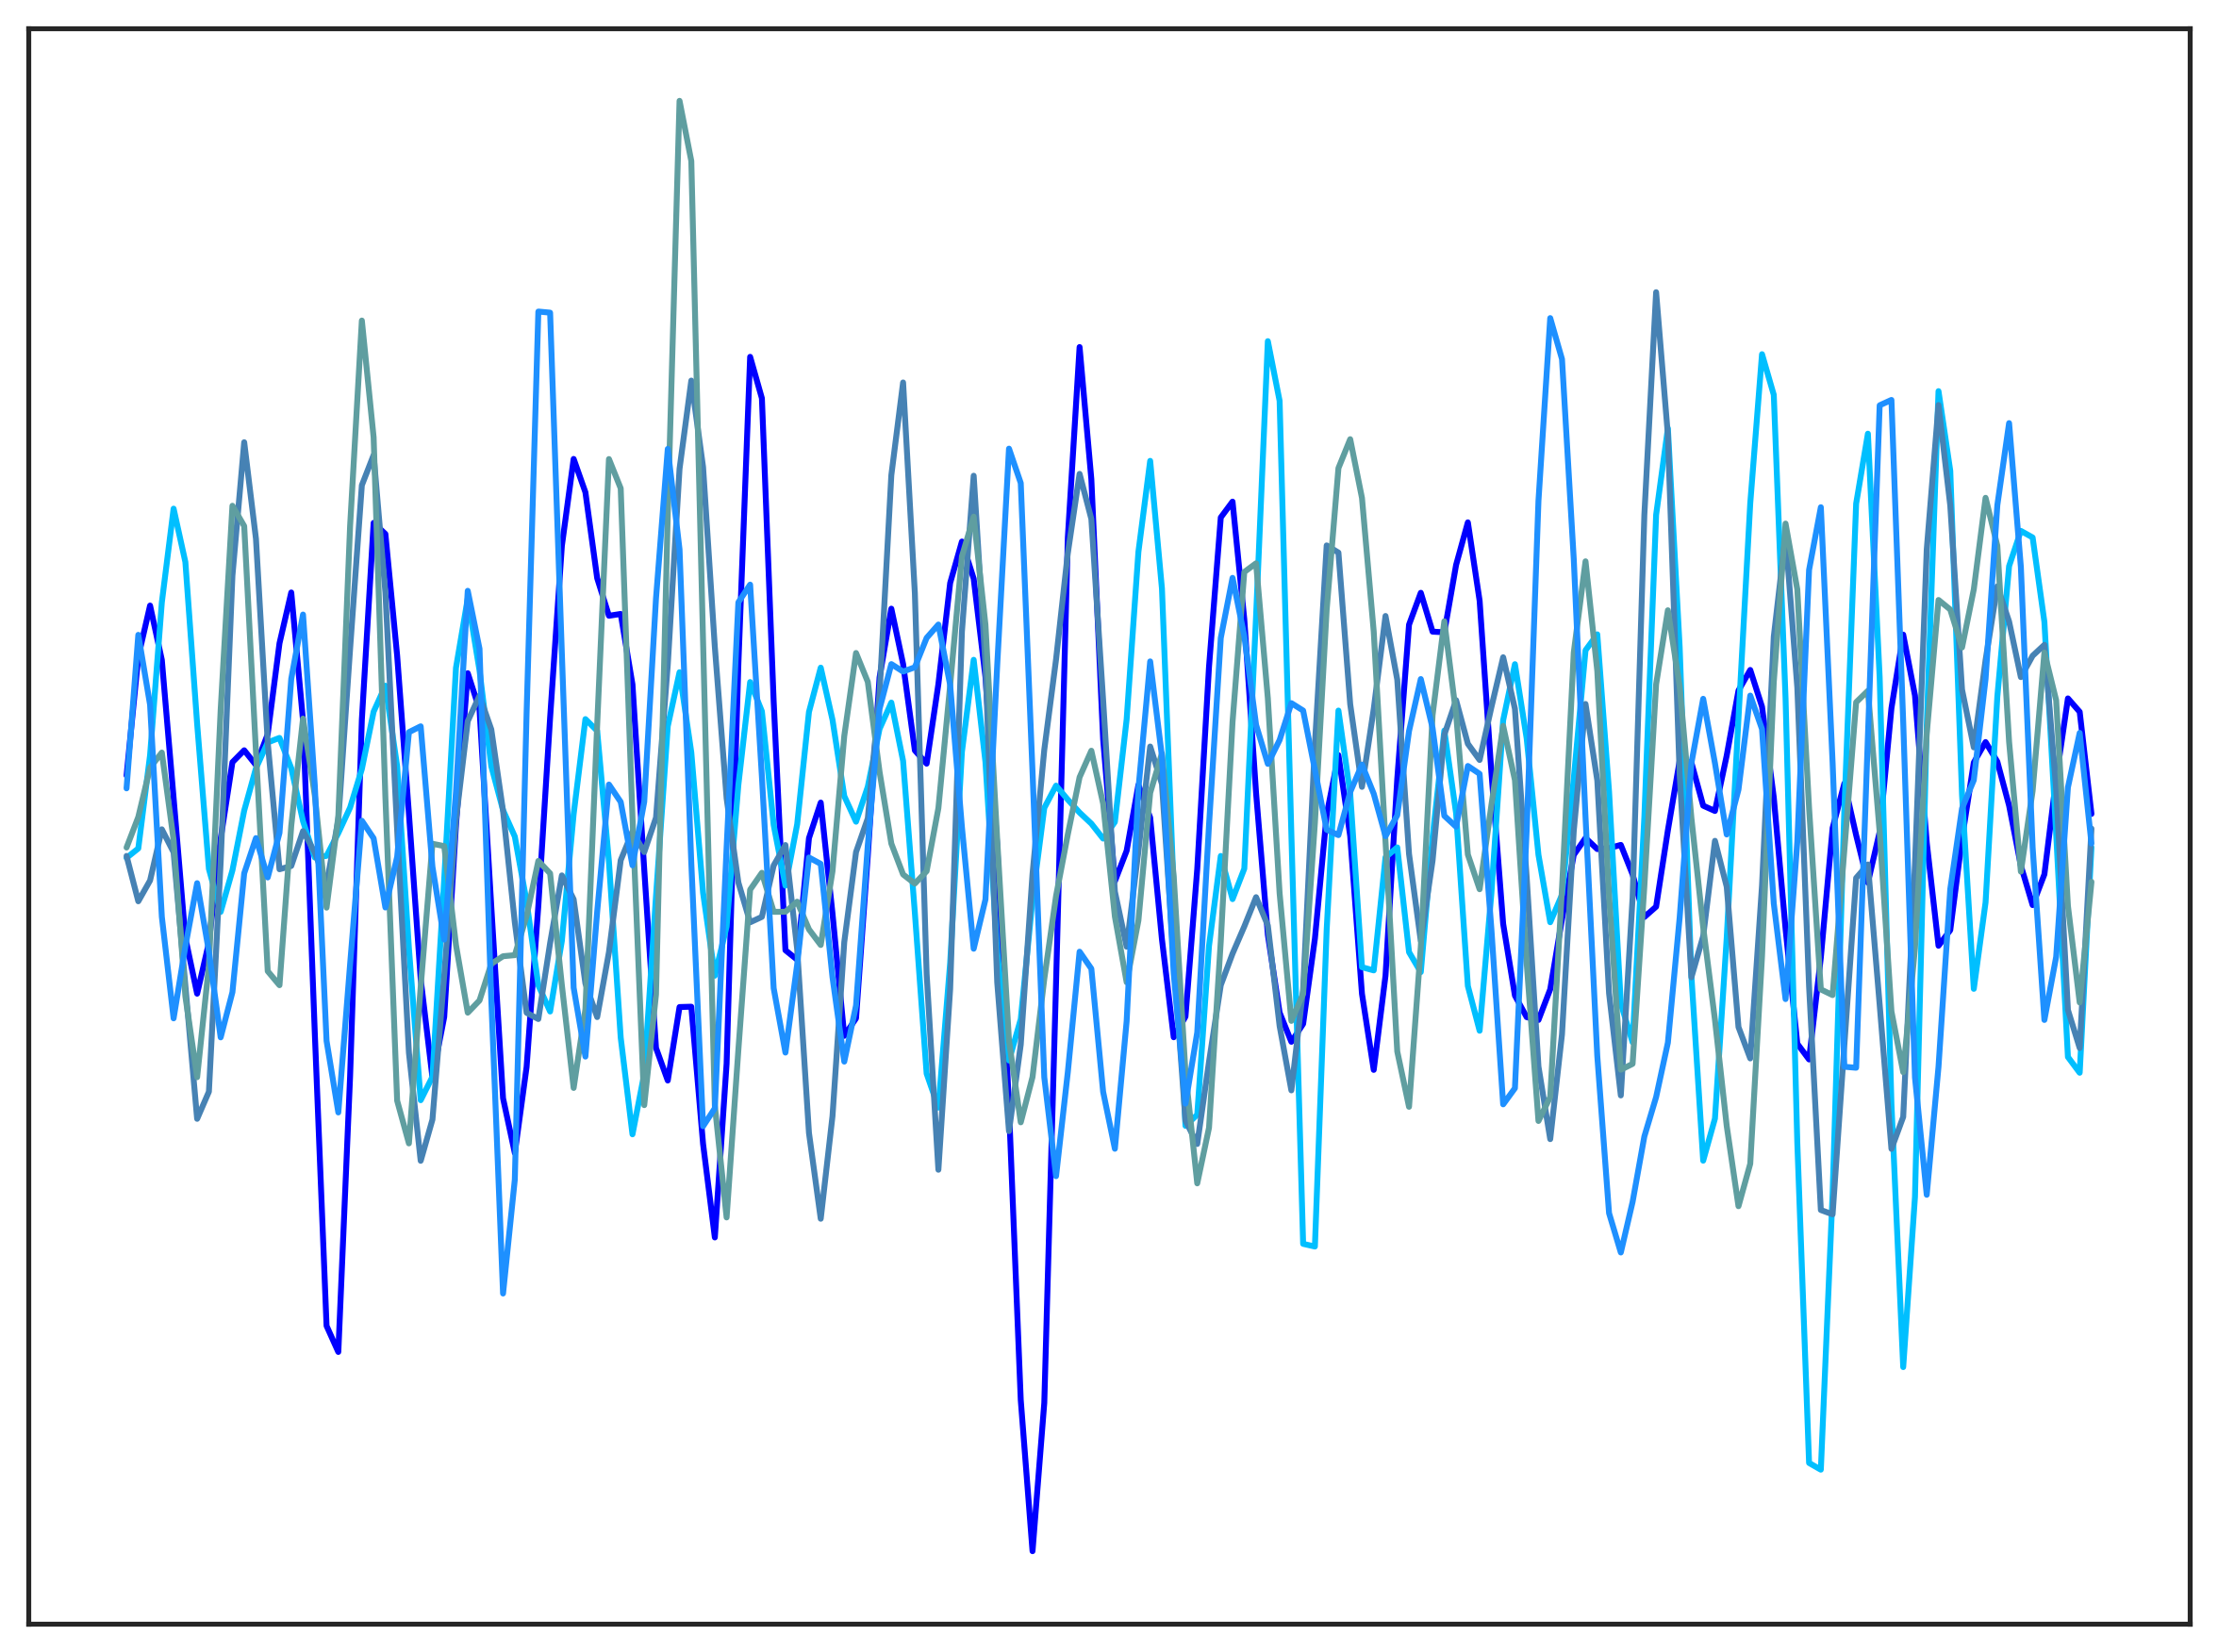

In [3]:

colors = ['blue', 'deepskyblue', 'steelblue', 'cadetblue', 'dodgerblue']  # Blue-related color palette
inds = [78, 89, 90, 91, 92]

fig,ax=plt.subplots(figsize=(8,6))
for i in range(5):
    plt.plot(brain_time_series[:, inds[i] ],color=colors[i])
ax.spines[:].set_visible(True)
ax.set_yticks([])
ax.set_xticks([])
plt.tight_layout()

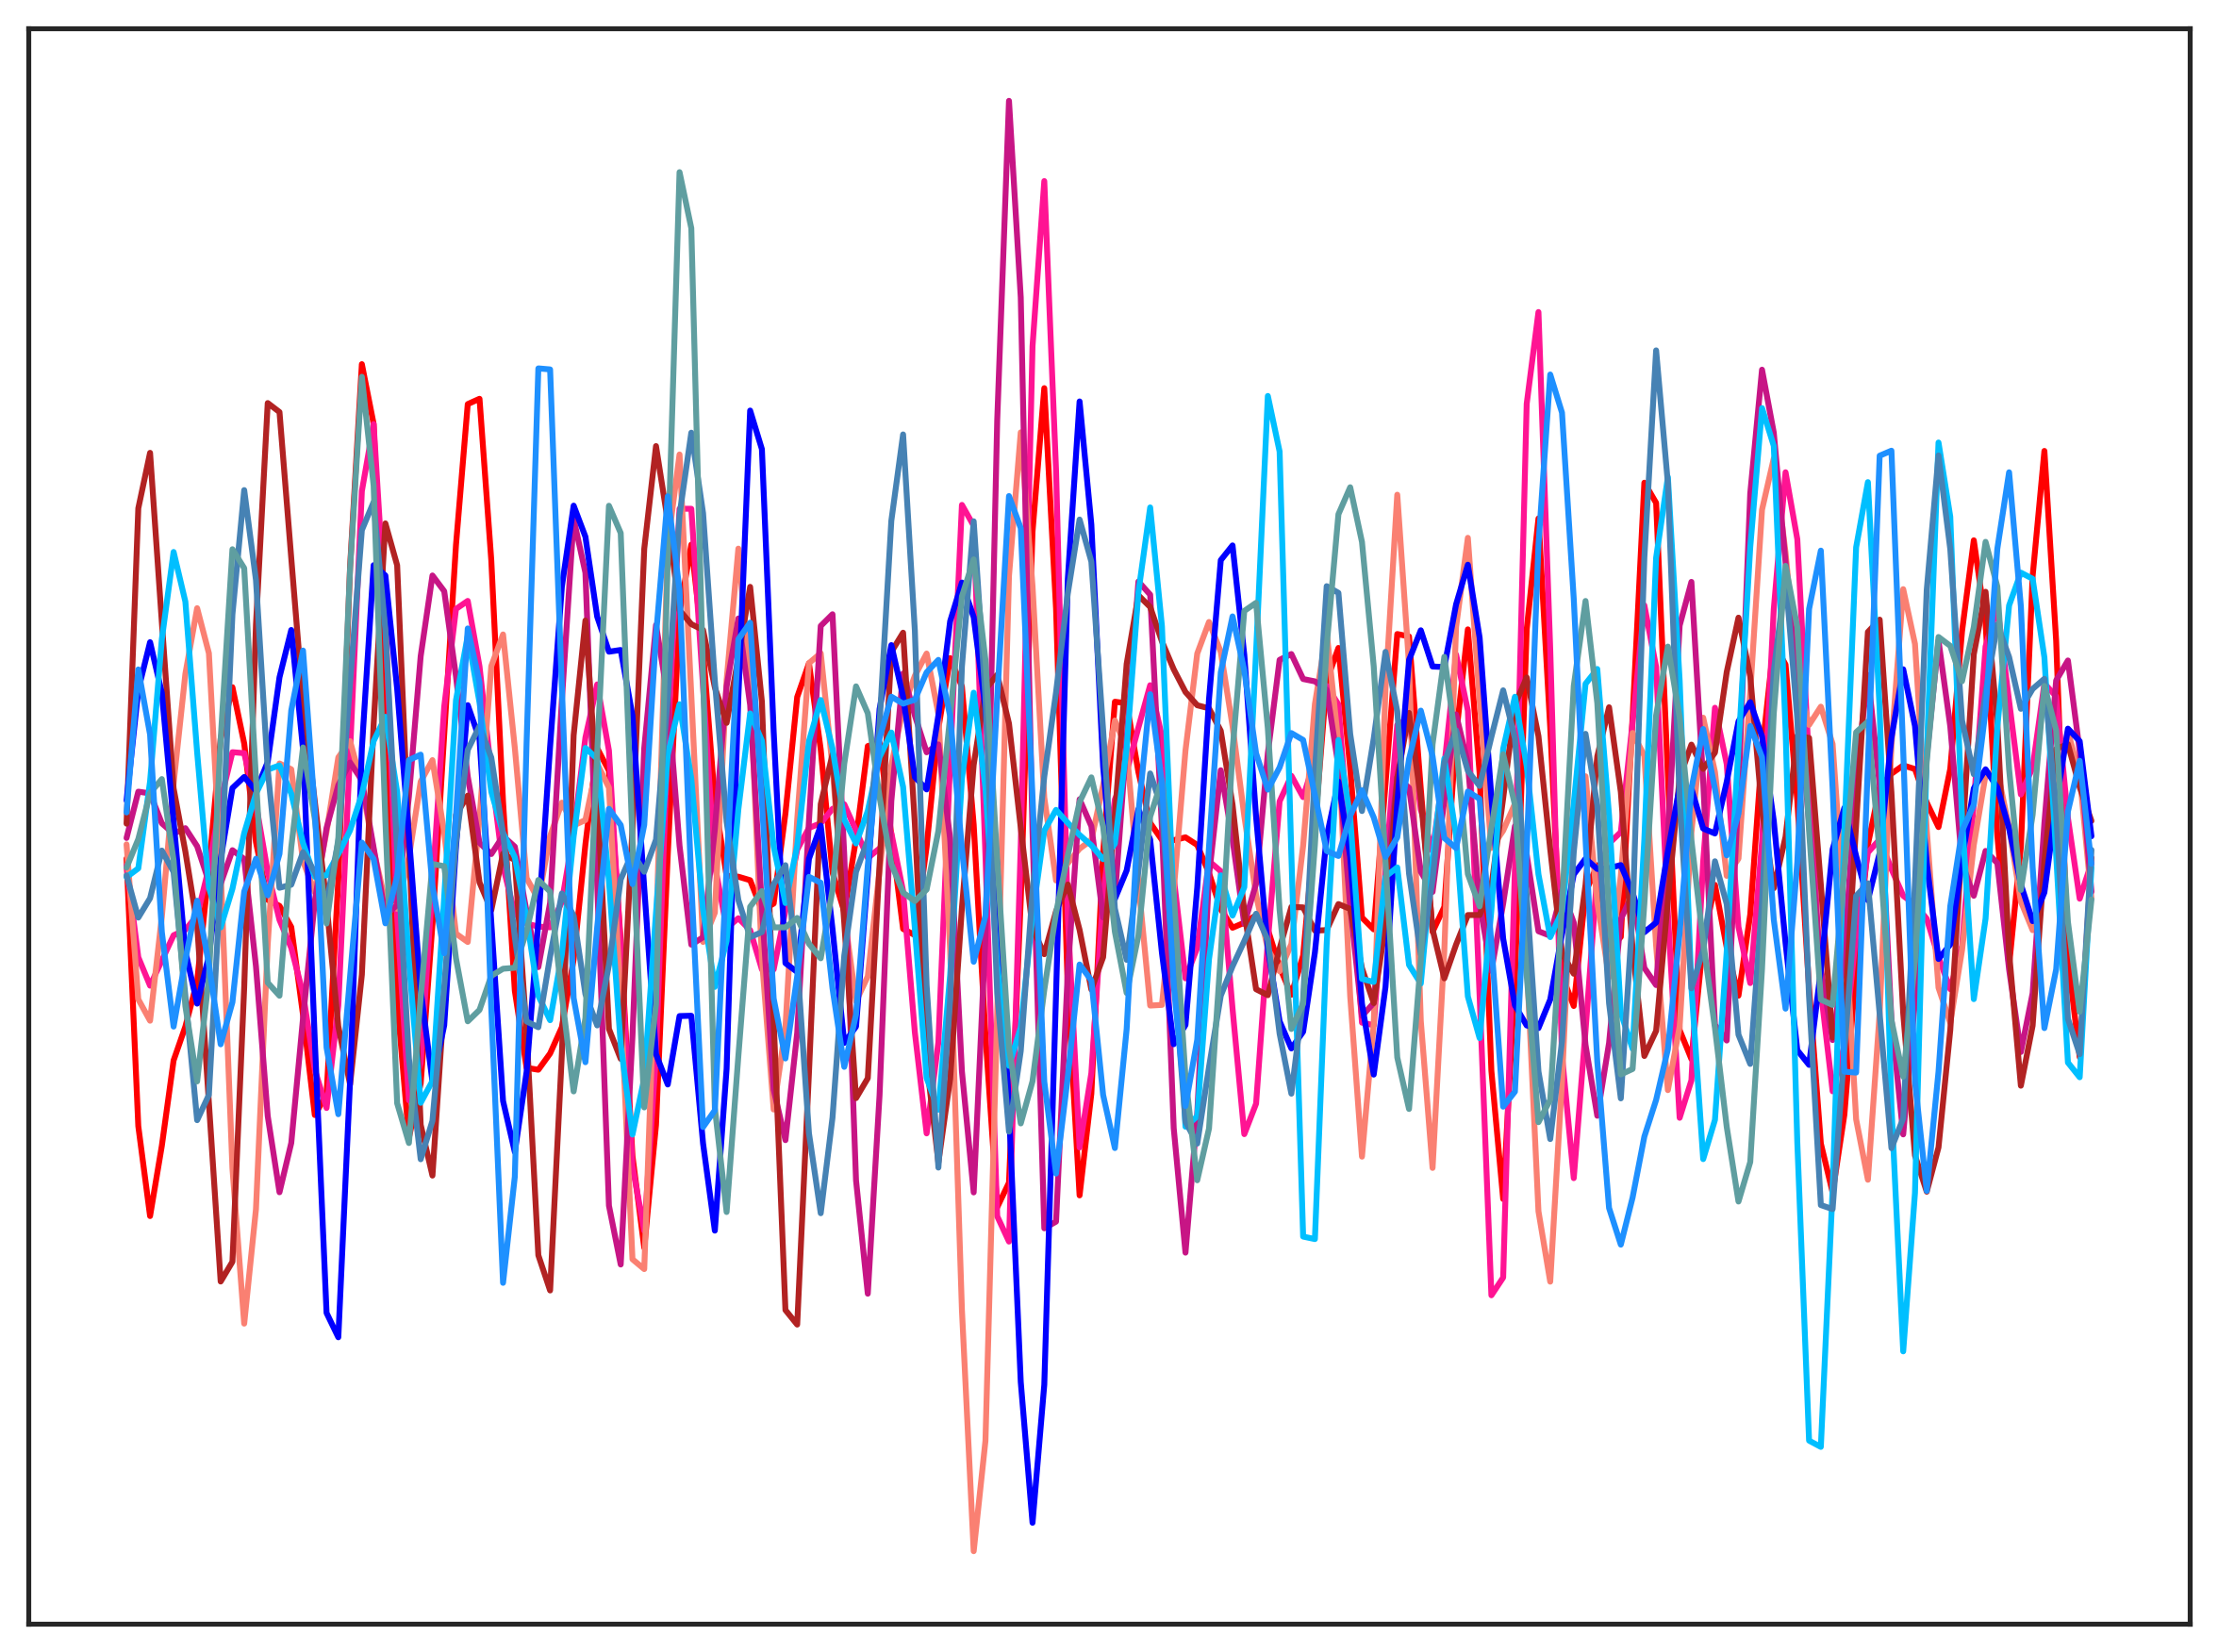

In [4]:

colors = ['red', 'deeppink', 'salmon', 'mediumvioletred', 'firebrick','blue', 'deepskyblue', 'steelblue', 'cadetblue', 'dodgerblue']  # Blue-related color palette
inds = [22, 33, 44, 55, 66,78, 89, 90, 91, 92]

fig,ax=plt.subplots(figsize=(8,6))
for i in range(10):
    plt.plot(brain_time_series[:, inds[i] ],color=colors[i])
ax.spines[:].set_visible(True)
ax.set_yticks([])
ax.set_xticks([])
plt.tight_layout()

# Functional Connectivity Matrix Using Simulated Data

In this section, we generate a **functional connectivity matrix** using simulated data to explain the characteristics of different models.


(-0.5, 29.5, 29.5, -0.5)

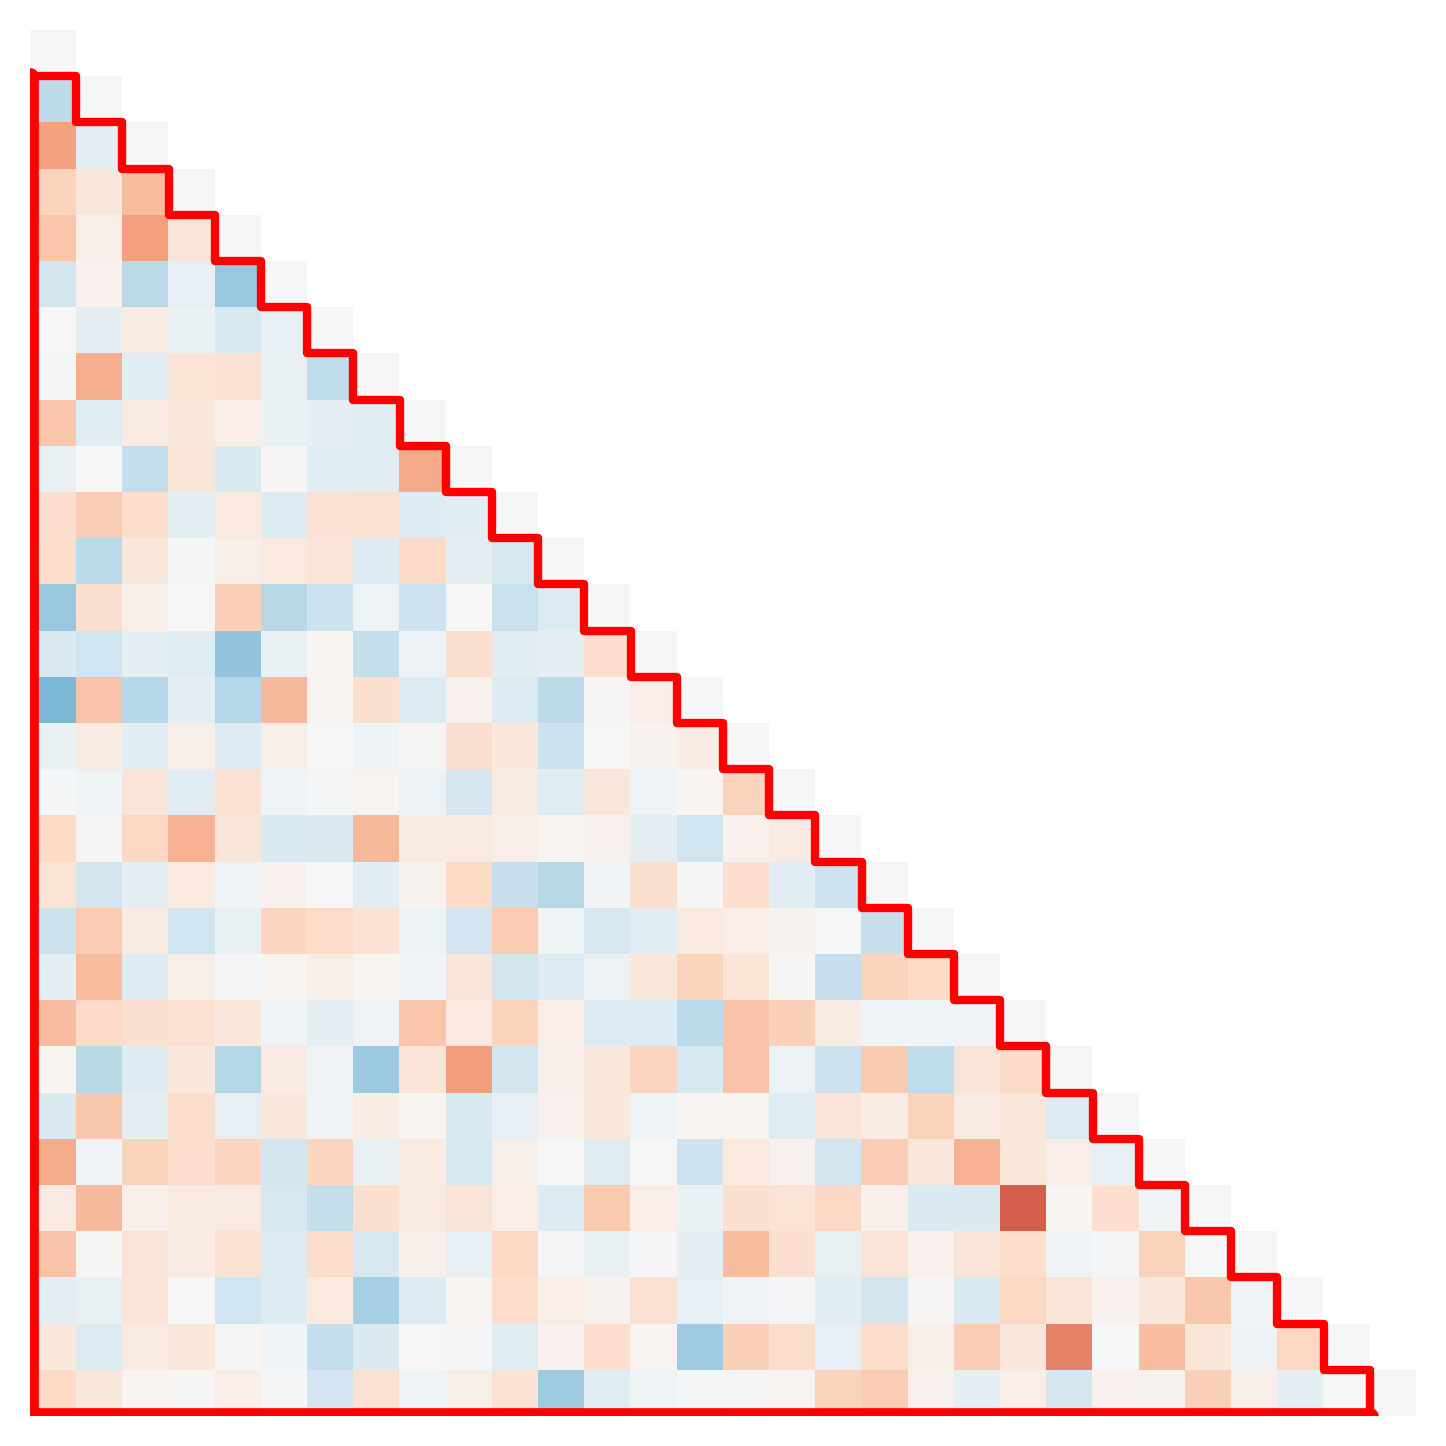

In [5]:
from nilearn.connectome import ConnectivityMeasure
np.random.seed(42)
sample_size = 30

inds_rand = np.random.choice(range(brain_time_series.shape[1]),sample_size)

correlation_measure = ConnectivityMeasure(
    kind="correlation",
    standardize="zscore_sample",
)
correlation_matrix = correlation_measure.fit_transform([brain_time_series[:,inds_rand]])[0]
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
correlation_matrix[mask] = np.nan
# Display the correlation matrix
import numpy as np

from nilearn import plotting

# Mask out the major diagonal
np.fill_diagonal(correlation_matrix, 0)
fig,ax=plt.subplots(figsize=(6,6))
plotting.plot_matrix(
    correlation_matrix,  colorbar=False, vmax=0.8, vmin=-0.8,axes = ax
)
ax.spines[:].set_visible(False)

# plt.plot([-0.5, sample_size-0.5], [-0.5, -0.5], color='red', linewidth=4)  # 上边界
plt.plot([-0.5, sample_size-1.5], [sample_size-0.5, sample_size-0.5], color='red', linewidth=4)  # 下边界
plt.plot([-0.5, -0.5], [0.5, sample_size-0.5], color='red', linewidth=4)  # 左边界
# 绘制锯齿形对角线的坐标
zag_x = np.repeat(np.arange(sample_size + 1), 2)
zag_y = np.repeat(np.arange(sample_size + 1), 2)

# 调整坐标以形成锯齿形线
zag_x = zag_x[1:-2]# 去除最后一个重复点

zag_y = np.roll(zag_y, -1)[1:-2]  # 将数组向左滚动一位并去除最后一个重复点

# 绘制锯齿形红线
ax.plot(zag_x - 0.5, zag_y - 0.5, color='red', linewidth=2, linestyle='-')

# 隐藏坐标轴
ax.axis('off')


(-0.5, 9.5, 9.5, -0.5)

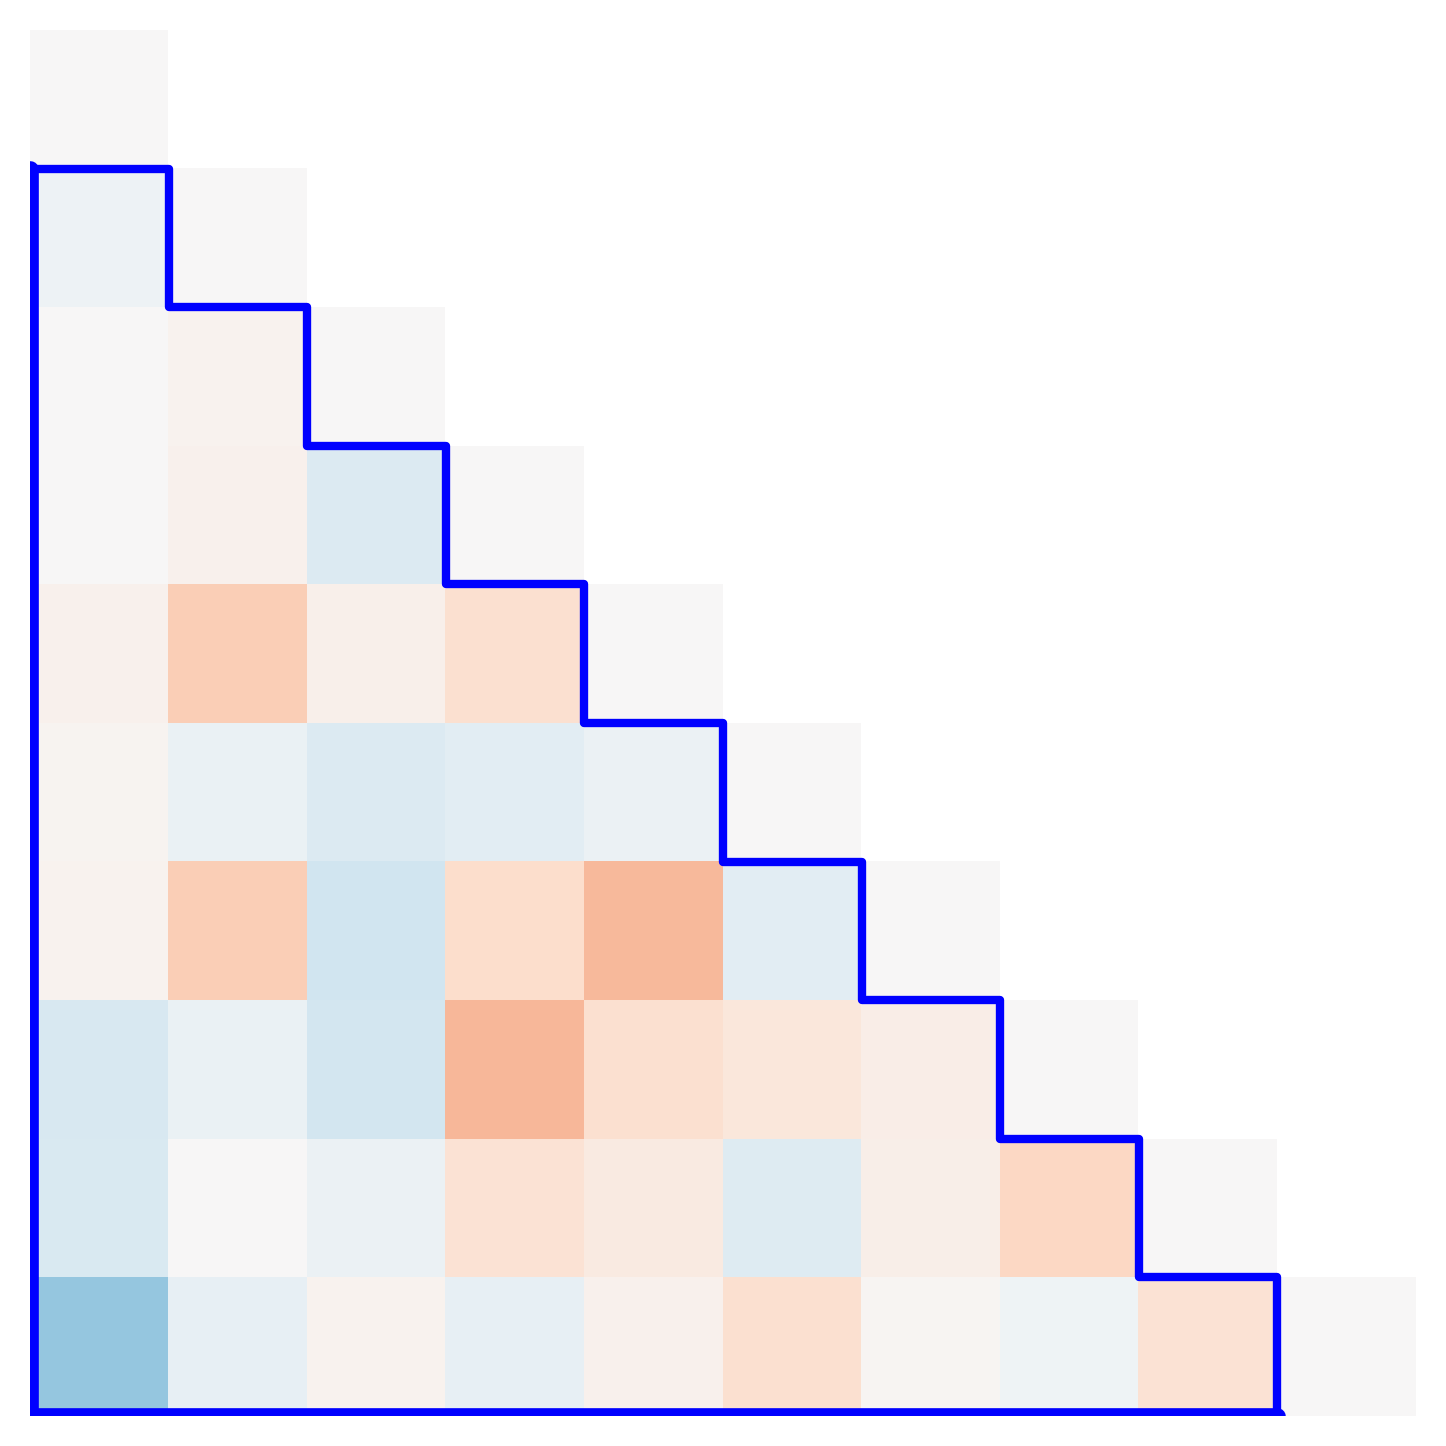

In [6]:
from nilearn.connectome import ConnectivityMeasure
np.random.seed(43)
inds_rand = np.random.choice(range(brain_time_series.shape[1]),10)

correlation_measure = ConnectivityMeasure(
    kind="correlation",
    standardize="zscore_sample",
)
correlation_matrix = correlation_measure.fit_transform([brain_time_series[:,inds_rand]])[0]
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
correlation_matrix[mask] = np.nan
sample_size = 10
# Display the correlation matrix
import numpy as np

from nilearn import plotting

# Mask out the major diagonal
np.fill_diagonal(correlation_matrix, 0)
fig,ax=plt.subplots(figsize=(6,6))
plotting.plot_matrix(
    correlation_matrix,  colorbar=False, vmax=0.8, vmin=-0.8,axes = ax
)
ax.spines[:].set_visible(False)

# plt.plot([-0.5, sample_size-0.5], [-0.5, -0.5], color='red', linewidth=4)  # 上边界
plt.plot([-0.5, sample_size-1.5], [sample_size-0.5, sample_size-0.5], color='blue', linewidth=4)  # 下边界
plt.plot([-0.5, -0.5], [0.5, sample_size-0.5], color='blue', linewidth=4)  # 左边界
# 绘制锯齿形对角线的坐标
zag_x = np.repeat(np.arange(sample_size + 1), 2)
zag_y = np.repeat(np.arange(sample_size + 1), 2)

# 调整坐标以形成锯齿形线
zag_x = zag_x[1:-2]# 去除最后一个重复点

zag_y = np.roll(zag_y, -1)[1:-2]  # 将数组向左滚动一位并去除最后一个重复点

# 绘制锯齿形红线
ax.plot(zag_x - 0.5, zag_y - 0.5, color='blue', linewidth=2, linestyle='-')

# 隐藏坐标轴
ax.axis('off')


(-0.5, 39.5, 39.5, -0.5)

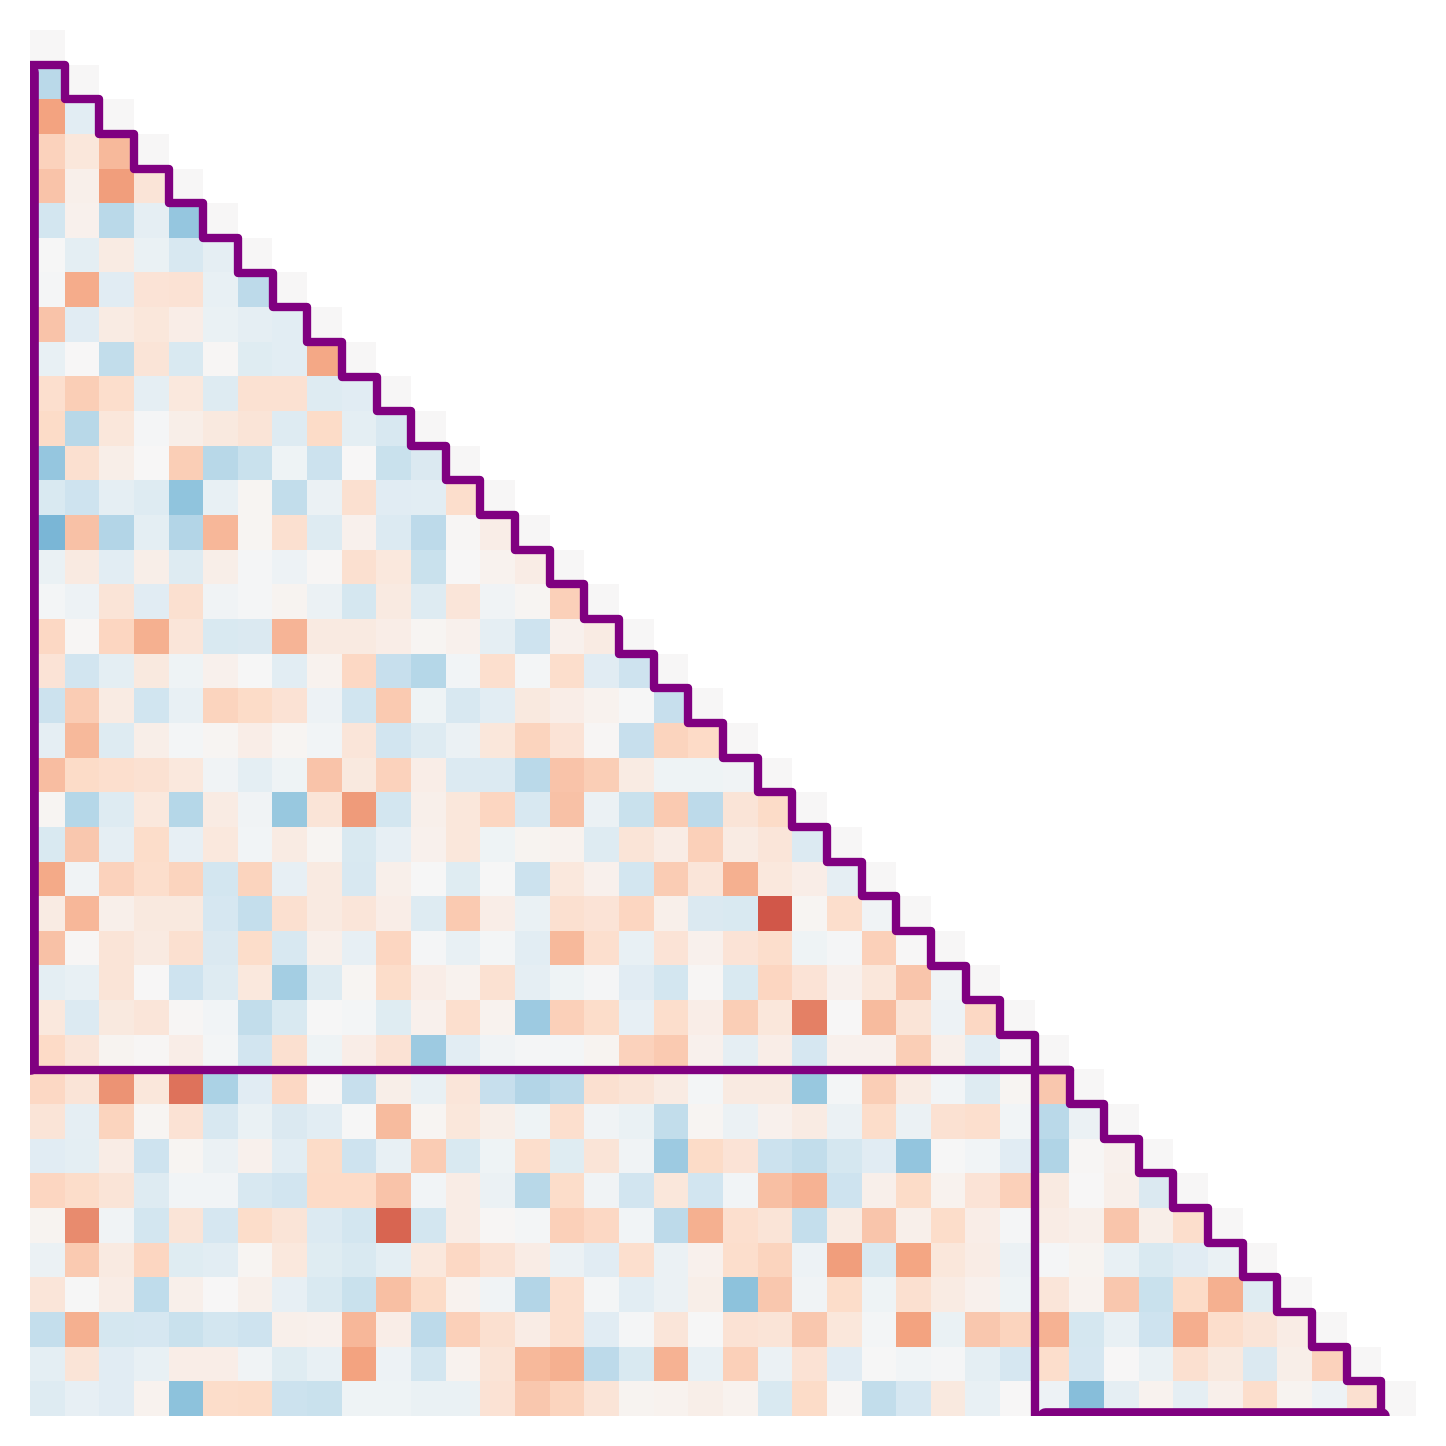

In [7]:
np.random.seed(42)
inds_rand1 = np.random.choice(range(brain_time_series.shape[1]),30)

np.random.seed(43)
inds_rand2 = np.random.choice(range(brain_time_series.shape[1]),10)
inds_rand = np.concatenate([inds_rand1,inds_rand2])
color = 'purple'

correlation_measure = ConnectivityMeasure(
    kind="correlation",
    standardize="zscore_sample",
)
correlation_matrix = correlation_measure.fit_transform([brain_time_series[:,inds_rand]])[0]
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
correlation_matrix[mask] = np.nan
sample_size = 40
# Display the correlation matrix
import numpy as np

from nilearn import plotting

# Mask out the major diagonal
np.fill_diagonal(correlation_matrix, 0)
fig,ax=plt.subplots(figsize=(6,6))
plotting.plot_matrix(
    correlation_matrix,  colorbar=False, vmax=0.8, vmin=-0.8,axes = ax
)
ax.spines[:].set_visible(False)

# plt.plot([-0.5, sample_size-0.5], [-0.5, -0.5], color='red', linewidth=4)  # 上边界
plt.plot([-0.5, sample_size-10.5], [sample_size-10.5, sample_size-10.5], color=color, linewidth=2)  # 下边界
plt.plot([-0.5, -0.5], [0.7, sample_size-10.6], color=color, linewidth=4)  # 左边界
# 右下角
plt.plot([sample_size-11.2,sample_size-1.5], [sample_size-0.5, sample_size-0.5], color=color, linewidth=4)  # 下边界
plt.plot([sample_size-11.5,sample_size-11.5], [sample_size-10.5,sample_size-0.5], color=color, linewidth=2)  # 左边界

# 绘制锯齿形对角线的坐标
zag_x = np.repeat(np.arange(sample_size + 1), 2)
zag_y = np.repeat(np.arange(sample_size + 1), 2)

# 调整坐标以形成锯齿形线
zag_x = zag_x[1:-2]# 去除最后一个重复点

zag_y = np.roll(zag_y, -1)[1:-2]  # 将数组向左滚动一位并去除最后一个重复点

# 绘制锯齿形红线
ax.plot(zag_x - 0.5, zag_y - 0.5, color=color, linewidth=2, linestyle='-')

# 隐藏坐标轴
ax.axis('off')


(-0.5, 39.5, 39.5, -0.5)

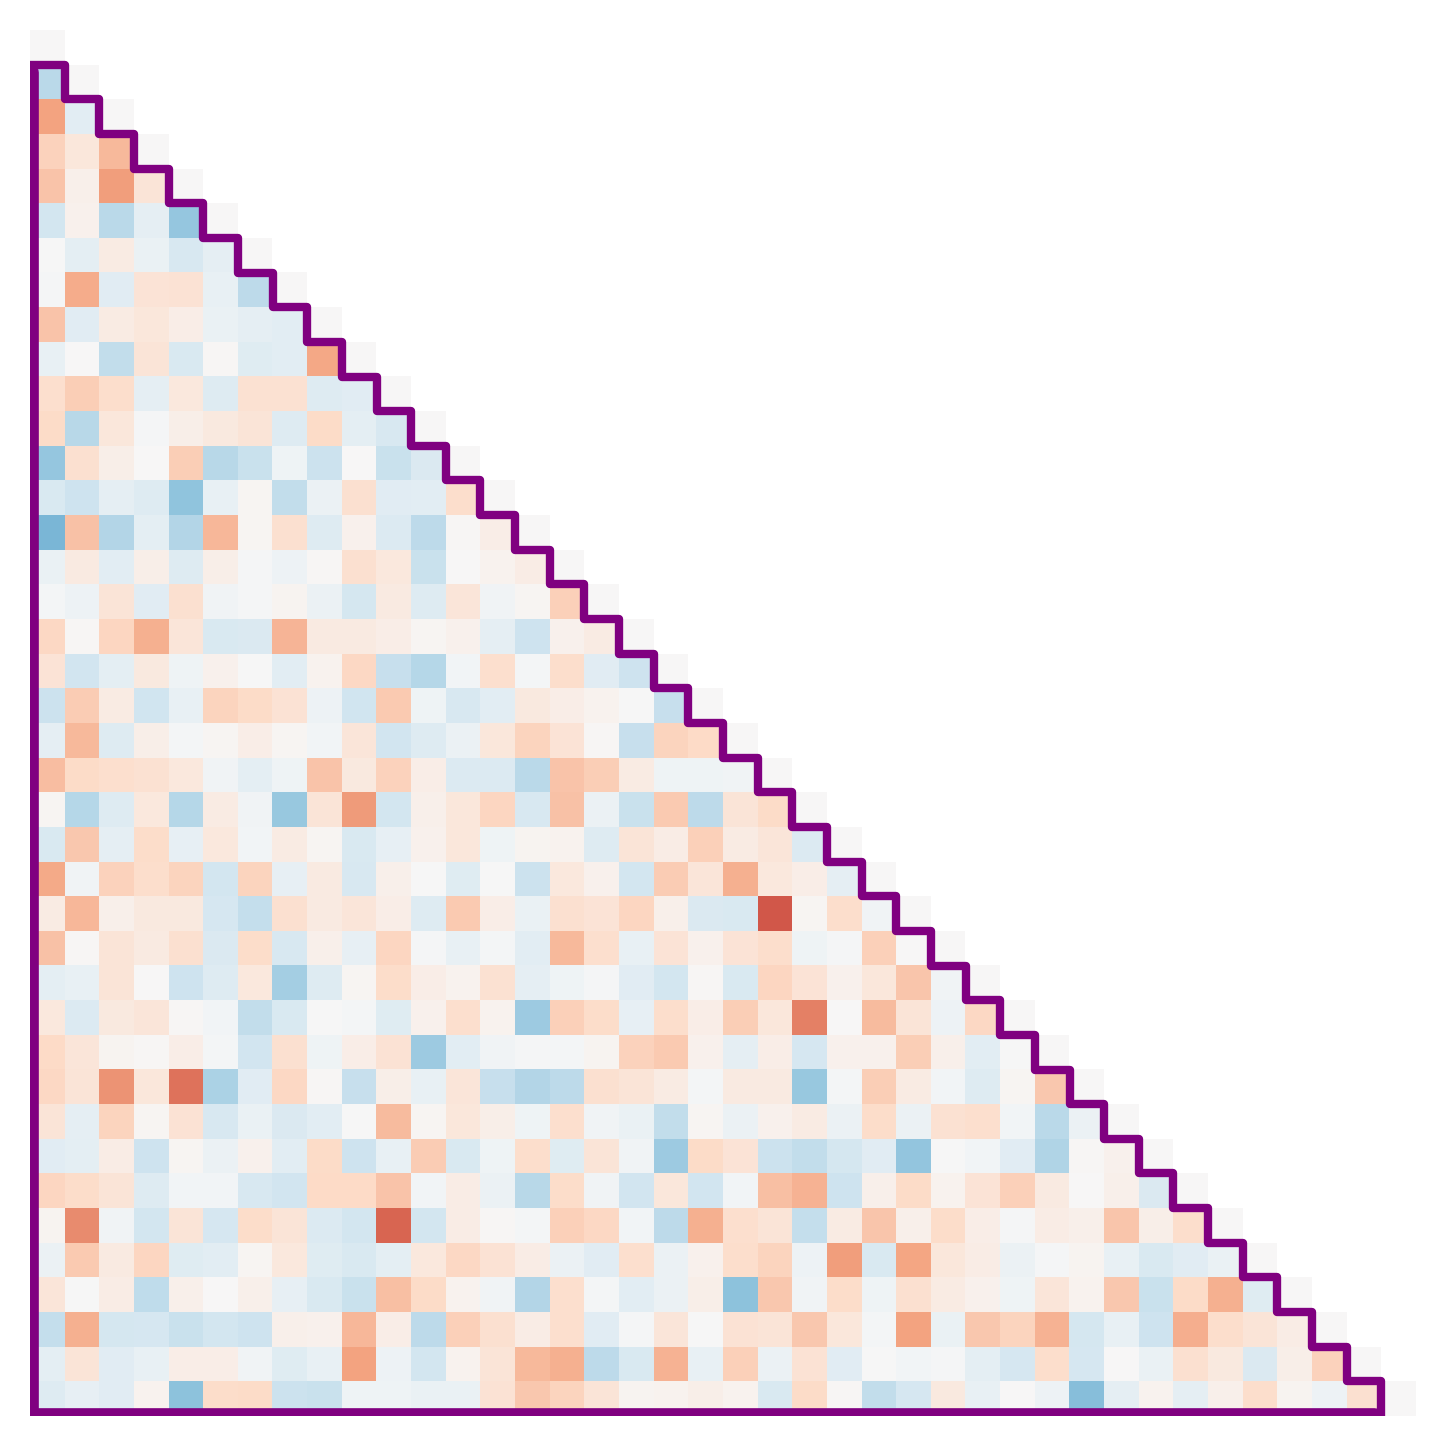

In [8]:
inds_rand = np.concatenate([inds_rand1,inds_rand2])
color = 'purple'

correlation_measure = ConnectivityMeasure(
    kind="correlation",
    standardize="zscore_sample",
)
correlation_matrix = correlation_measure.fit_transform([brain_time_series[:,inds_rand]])[0]
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
correlation_matrix[mask] = np.nan
sample_size = 40
# Display the correlation matrix
import numpy as np

from nilearn import plotting

# Mask out the major diagonal
np.fill_diagonal(correlation_matrix, 0)
fig,ax=plt.subplots(figsize=(6,6))
plotting.plot_matrix(
    correlation_matrix,  colorbar=False, vmax=0.8, vmin=-0.8,axes = ax
)
ax.spines[:].set_visible(False)

plt.plot([-0.5, sample_size-1.7], [sample_size-0.5, sample_size-0.5], color=color, linewidth=4)  # 下边界
plt.plot([-0.5, -0.5], [0.7, sample_size-0.6], color=color, linewidth=4)  # 左边界
# # 右下角
# plt.plot([sample_size-11.2,sample_size-1.5], [sample_size-0.5, sample_size-0.5], color=color, linewidth=4)  # 下边界
# plt.plot([sample_size-11.5,sample_size-11.5], [sample_size-10.5,sample_size-0.5], color=color, linewidth=2)  # 左边界

# 绘制锯齿形对角线的坐标
zag_x = np.repeat(np.arange(sample_size + 1), 2)
zag_y = np.repeat(np.arange(sample_size + 1), 2)

# 调整坐标以形成锯齿形线
zag_x = zag_x[1:-2]# 去除最后一个重复点

zag_y = np.roll(zag_y, -1)[1:-2]  # 将数组向左滚动一位并去除最后一个重复点

# 绘制锯齿形红线
ax.plot(zag_x - 0.5, zag_y - 0.5, color=color, linewidth=2, linestyle='-')

# 隐藏坐标轴
ax.axis('off')


(-0.5, 39.5, 39.5, -0.5)

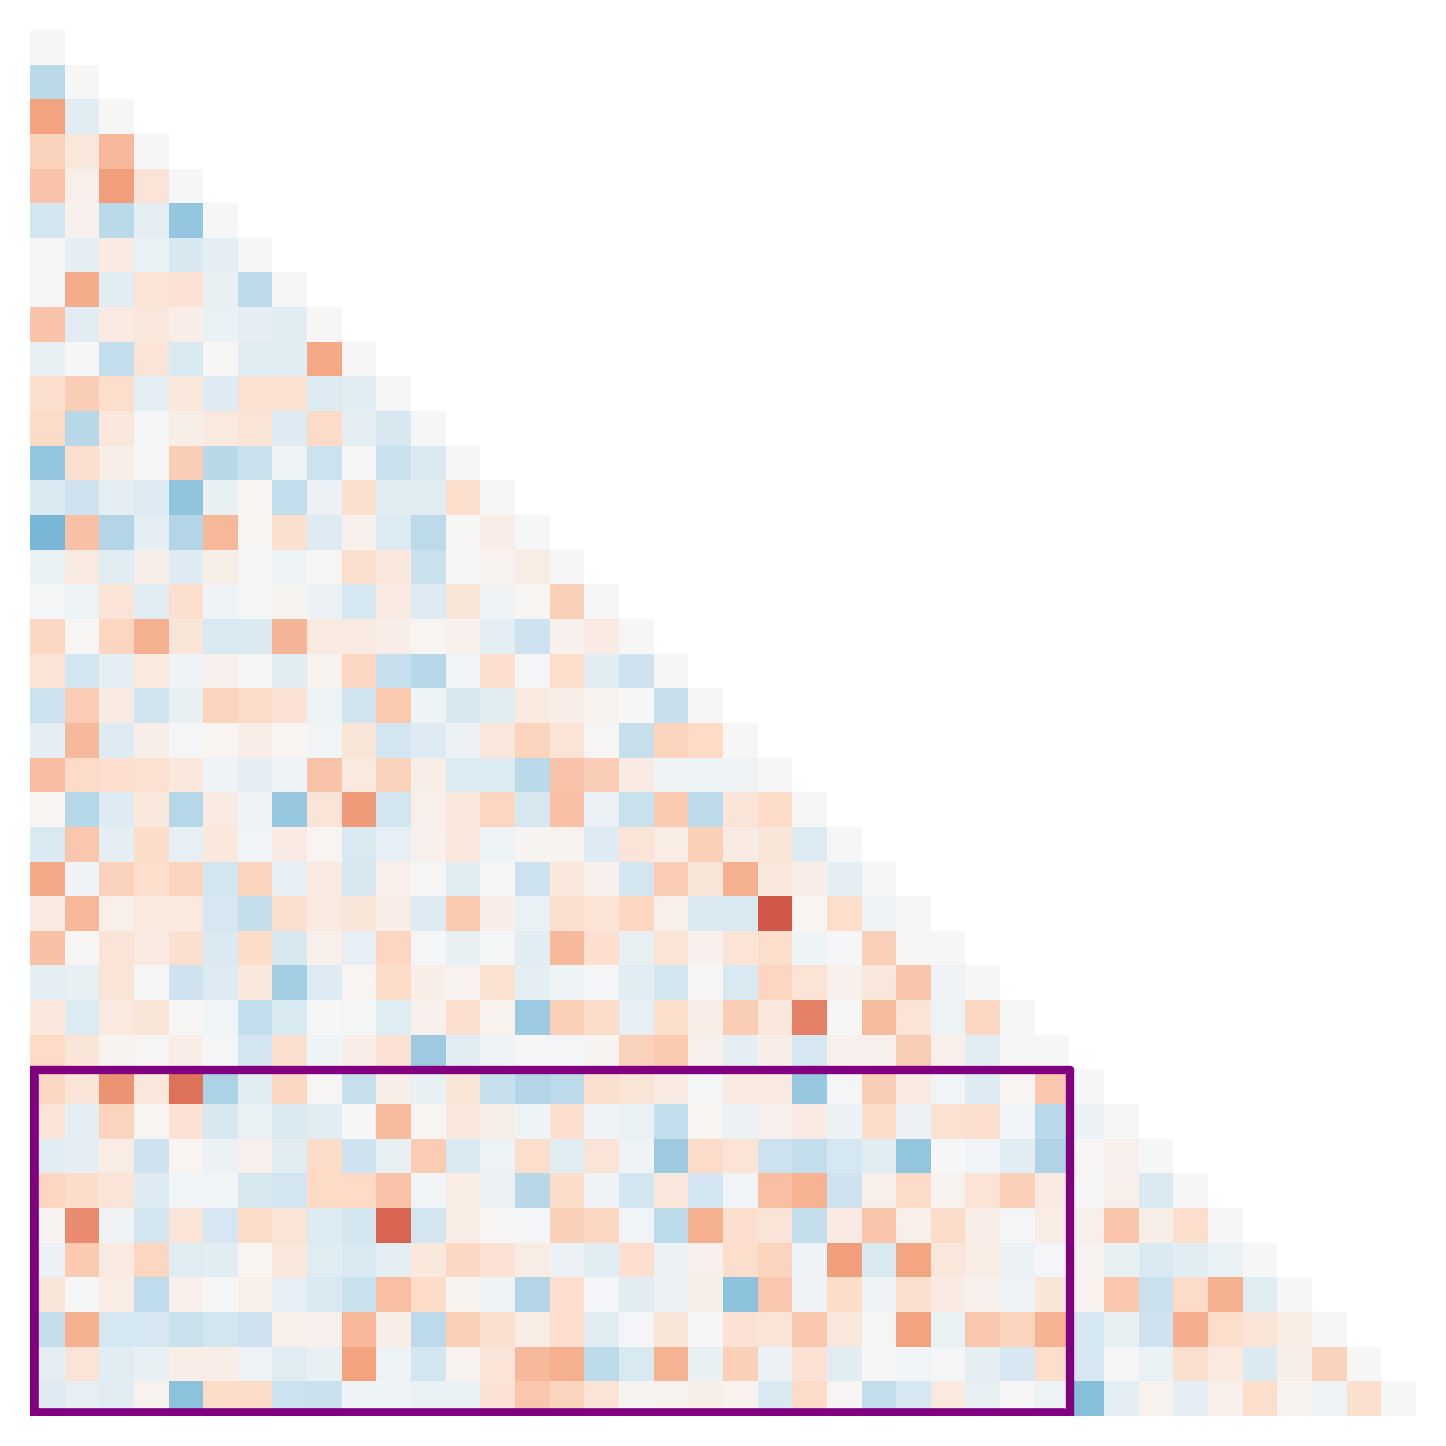

In [9]:
inds_rand = np.concatenate([inds_rand1,inds_rand2])
color = 'purple'

correlation_measure = ConnectivityMeasure(
    kind="correlation",
    standardize="zscore_sample",
)
correlation_matrix = correlation_measure.fit_transform([brain_time_series[:,inds_rand]])[0]
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
correlation_matrix[mask] = np.nan
sample_size = 40
# Display the correlation matrix
import numpy as np

from nilearn import plotting

# Mask out the major diagonal
np.fill_diagonal(correlation_matrix, 0)
fig,ax=plt.subplots(figsize=(6,6))
plotting.plot_matrix(
    correlation_matrix,  colorbar=False, vmax=0.8, vmin=-0.8,axes = ax
)
ax.spines[:].set_visible(False)

# plt.plot([-0.5, sample_size-0.5], [-0.5, -0.5], color='red', linewidth=4)  # 上边界
plt.plot([-0.5, sample_size-10.5], [sample_size-10.5, sample_size-10.5], color=color, linewidth=2)  # 下边界
# 右下角
plt.plot([-0.5, sample_size-10.7], [sample_size-0.5, sample_size-0.5], color=color, linewidth=4)  # 下边界
plt.plot([sample_size-10.5,sample_size-10.5], [sample_size-10.5,sample_size-0.5], color=color, linewidth=2)  # 左边界
plt.plot([-0.5,-0.5], [sample_size-10.3,sample_size-0.5], color=color, linewidth=4)  # 左边界

# 绘制锯齿形对角线的
# 隐藏坐标轴
ax.axis('off')


# Validating the Correlation of Different Models in Dataset 2 and Dataset 3

In this section, we validate how different models correlate with two datasets (**Dataset 2** and **Dataset 3**), and compare the performance and behavior of these models when applied to the datasets.


In [10]:

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_absolute_error
from scipy.stats import pearsonr
from matplotlib.ticker import MaxNLocator

def plot_d2d3(x1,y1,x2,y2):

    color1='darkred'
    color2='tab:blue'
    # 创建图表
    plt.figure(figsize=(7, 6))
    ax = plt.gca()  # 获取当前坐标轴

    # 为每个数据集绘制回归散点图
    sns.regplot(x=x1, y=y1, scatter_kws={'alpha':0.6, 'color':color1}, line_kws={'color':color1}, ax=ax, label='Dataset 2')
    sns.regplot(x=x2, y=y2, scatter_kws={'alpha':0.6, 'color':color2}, line_kws={'color':color2}, ax=ax, label='Dataset 3')

    # 自定义图表标题和轴标签
    ax.set_xlabel('Observed pain sensitivity')
    ax.set_ylabel('Predicted pain sensitivity')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # 计算每个数据集的相关系数
    r1,p1=pearsonr(x1,y1)
    r2,p2=pearsonr(x2,y2)
    # 添加相关系数的注释
    ax.text(0.05, 0.95, f'Dataset 2: r = {r1:.2f}, p = {p1:.3f}', transform=ax.transAxes, color=color1)
    ax.text(0.05, 0.90, f'Dataset 3: r = {r2:.2f}, p = {p2:.3f}', transform=ax.transAxes, color=color2)
    ax.xaxis.set_major_locator(MaxNLocator(3))  # 在x轴上最多显示5个刻度
    ax.yaxis.set_major_locator(MaxNLocator(3))  # 在y轴上最多显示4个刻度
    plt.ylim(-1.5,1.8)

    # 显示图例
    plt.legend()

    # 显示图表
    plt.show()


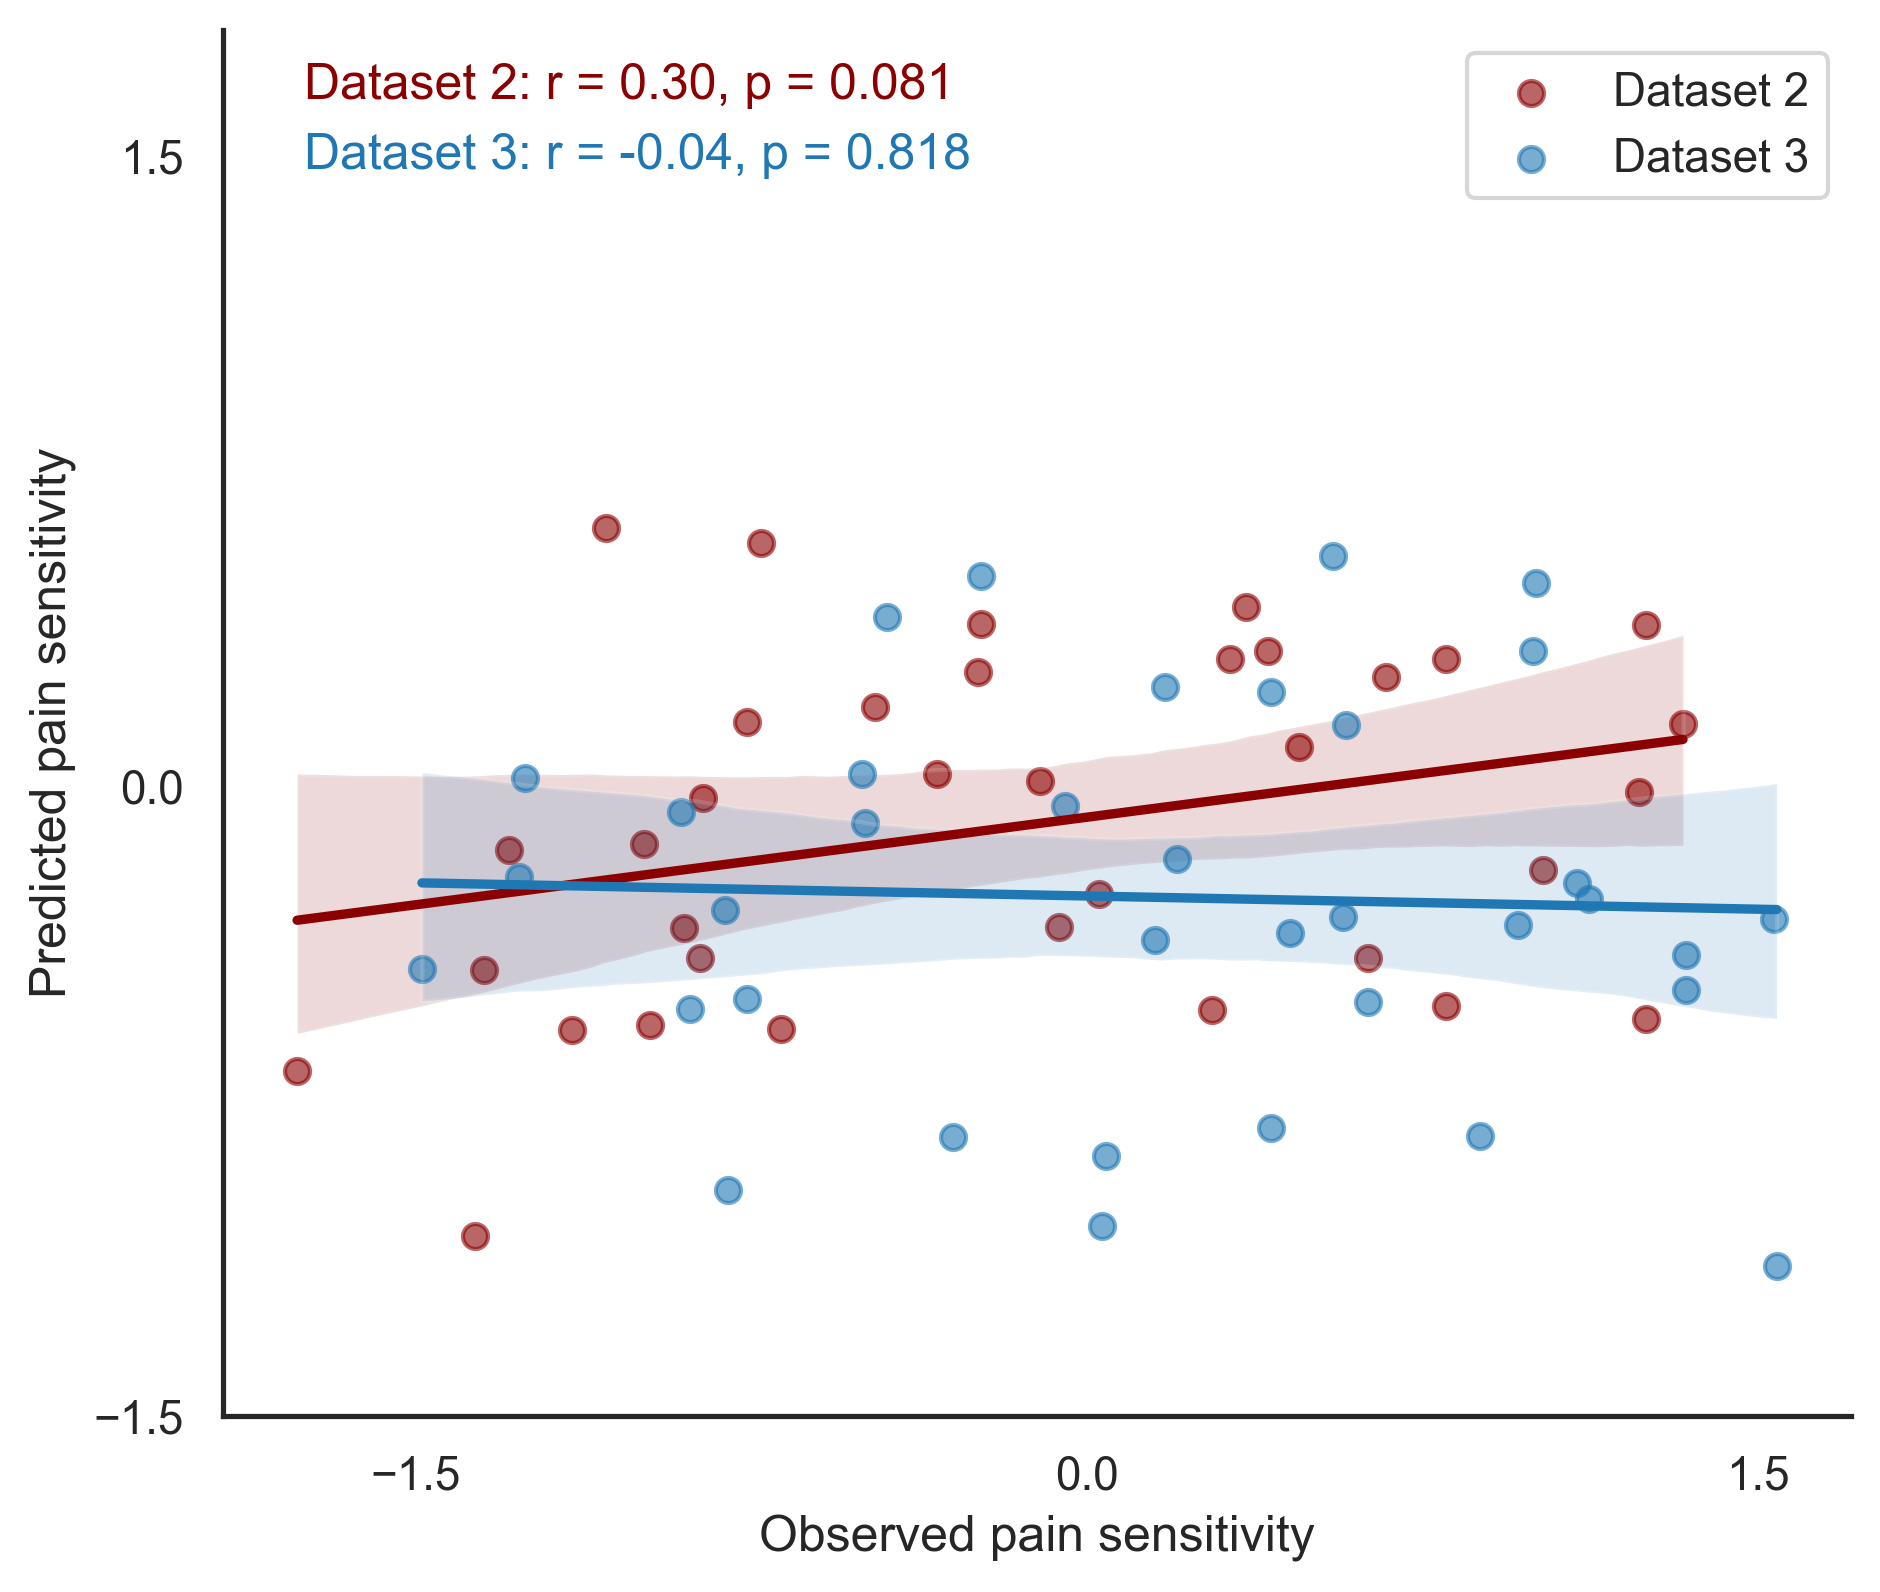

In [11]:
# M1
xd2 = np.load(f'/home/lxm/lxm/post_braincord/scripts/5post_stats/1_all_analysis/validation_b_bs/final/brain_xd2.npy',)
yd2 = np.load(f'/home/lxm/lxm/post_braincord/scripts/5post_stats/1_all_analysis/validation_b_bs/final/brain_yd2.npy',)
xd3 = np.load(f'/home/lxm/lxm/post_braincord/scripts/5post_stats/1_all_analysis/validation_b_bs/final/brain_xd3.npy',)
yd3 = np.load(f'/home/lxm/lxm/post_braincord/scripts/5post_stats/1_all_analysis/validation_b_bs/final/brain_yd3.npy')
plot_d2d3(xd2,yd2,xd3,yd3)

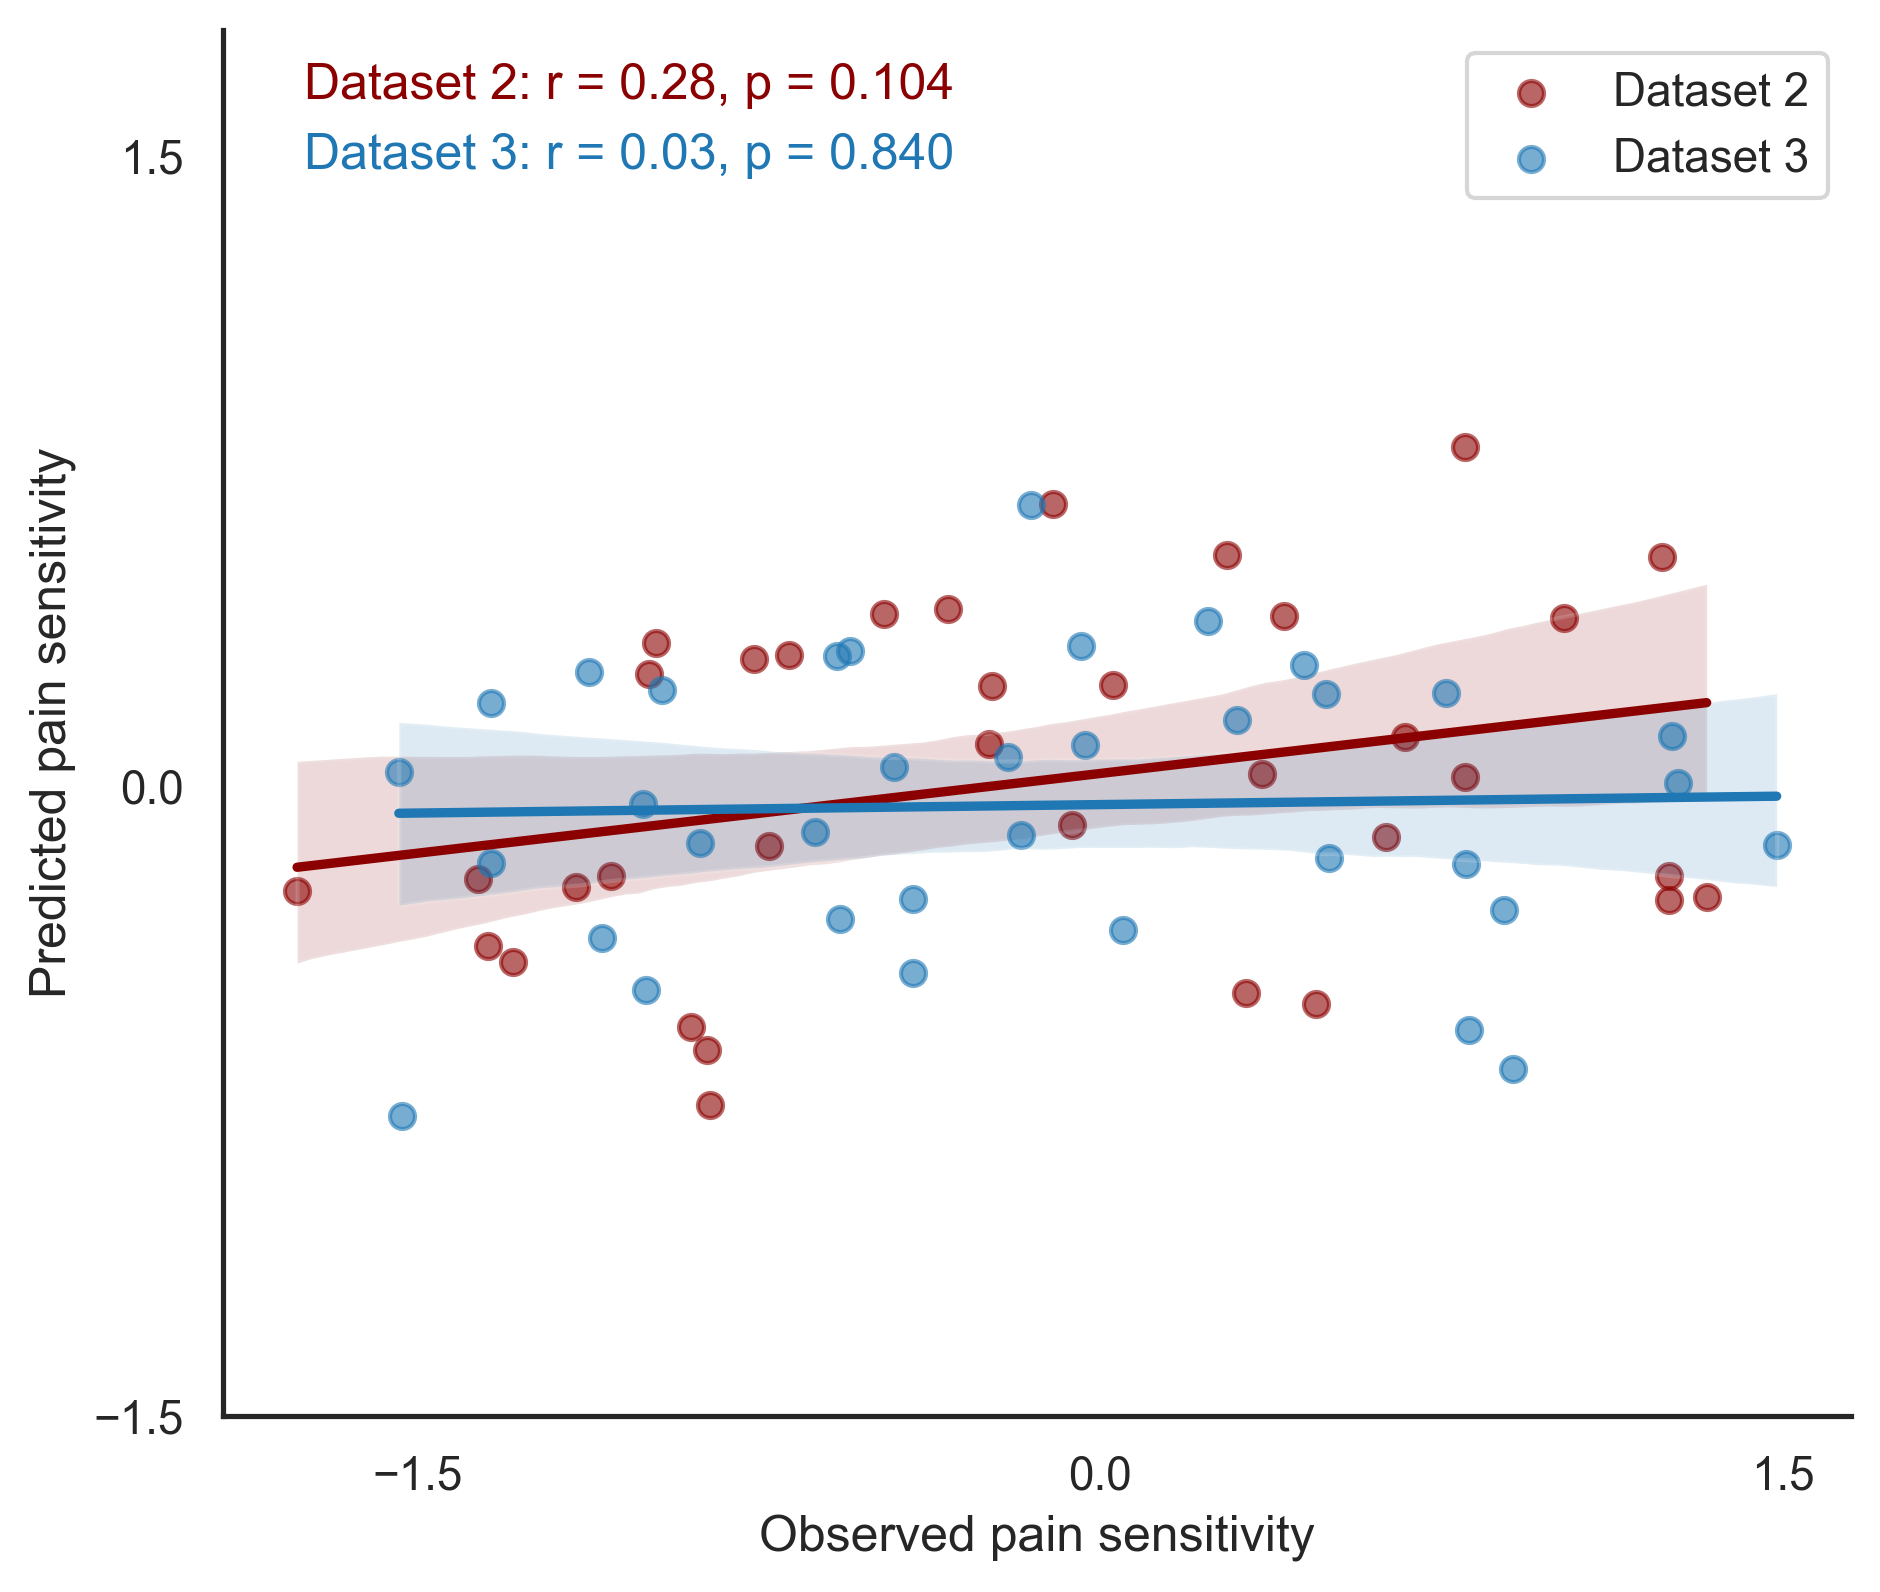

In [12]:
# M2
xd2 = np.load(f'/home/lxm/lxm/post_braincord/scripts/5post_stats/1_all_analysis/validation_b_bs/final/spinal_xd2.npy',)
yd2 = np.load(f'/home/lxm/lxm/post_braincord/scripts/5post_stats/1_all_analysis/validation_b_bs/final/spinal_yd2.npy',)
xd3 = np.load(f'/home/lxm/lxm/post_braincord/scripts/5post_stats/1_all_analysis/validation_b_bs/final/spinal_xd3.npy',)
yd3 = np.load(f'/home/lxm/lxm/post_braincord/scripts/5post_stats/1_all_analysis/validation_b_bs/final/spinal_yd3.npy')
plot_d2d3(xd2,yd2,xd3,yd3)

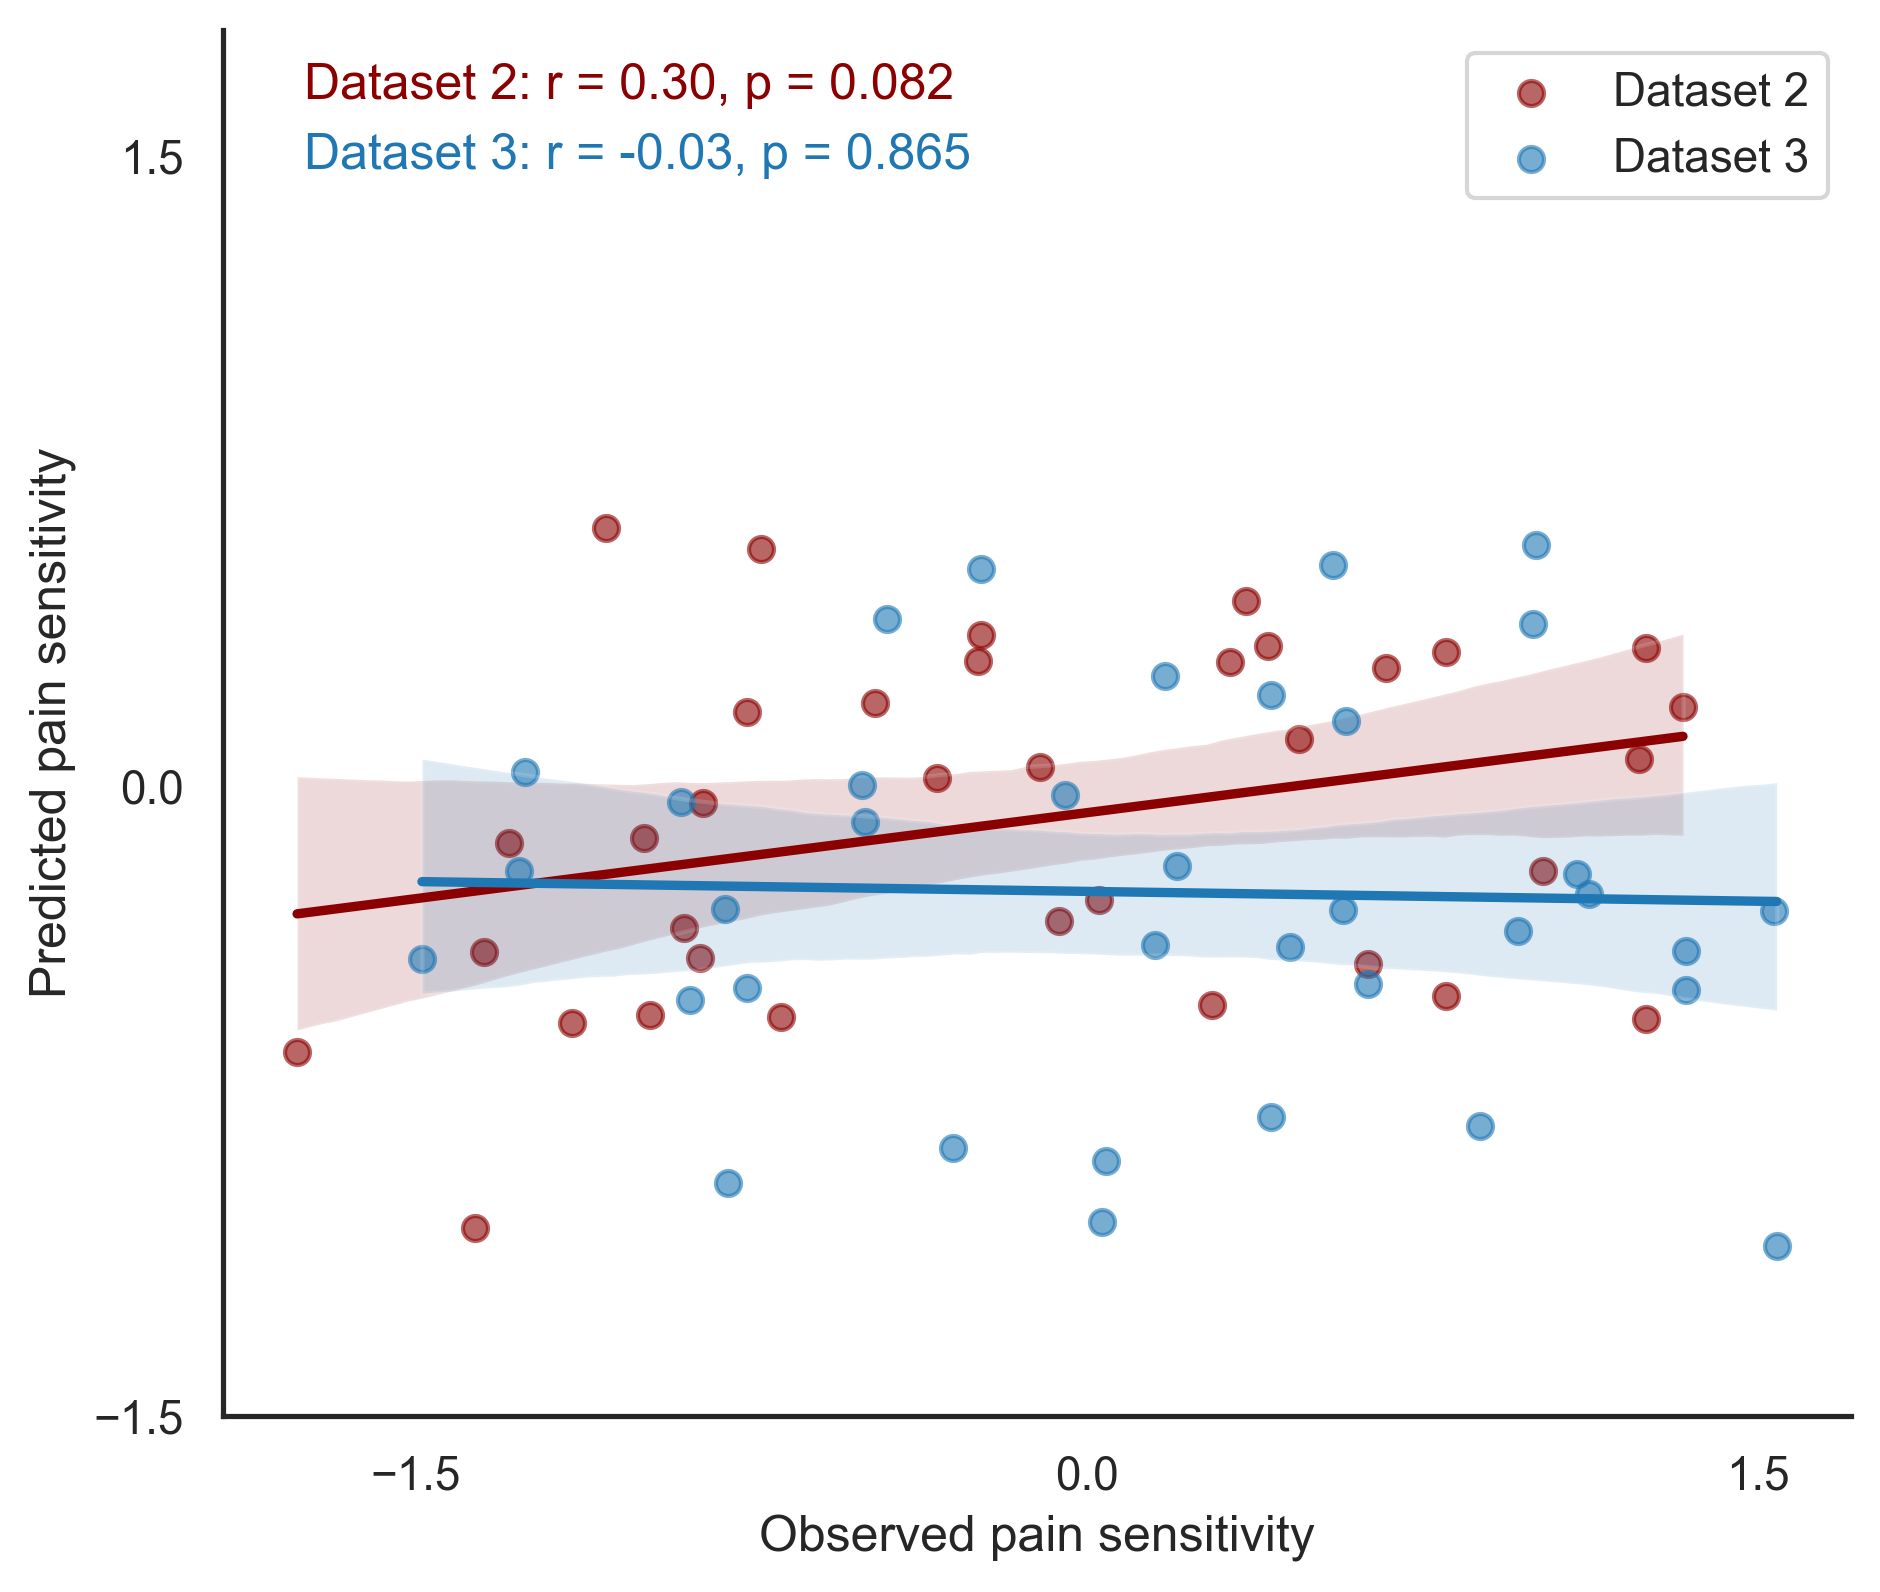

In [13]:
# M3
xd2 = np.load(f'/home/lxm/lxm/post_braincord/scripts/5post_stats/1_all_analysis/validation_b_bs/final/M3_xd2.npy',)
yd2 = np.load(f'/home/lxm/lxm/post_braincord/scripts/5post_stats/1_all_analysis/validation_b_bs/final/M3_yd2.npy',)
xd3 = np.load(f'/home/lxm/lxm/post_braincord/scripts/5post_stats/1_all_analysis/validation_b_bs/final/M3_xd3.npy',)
yd3 = np.load(f'/home/lxm/lxm/post_braincord/scripts/5post_stats/1_all_analysis/validation_b_bs/final/M3_yd3.npy')
plot_d2d3(xd2,yd2,xd3,yd3)

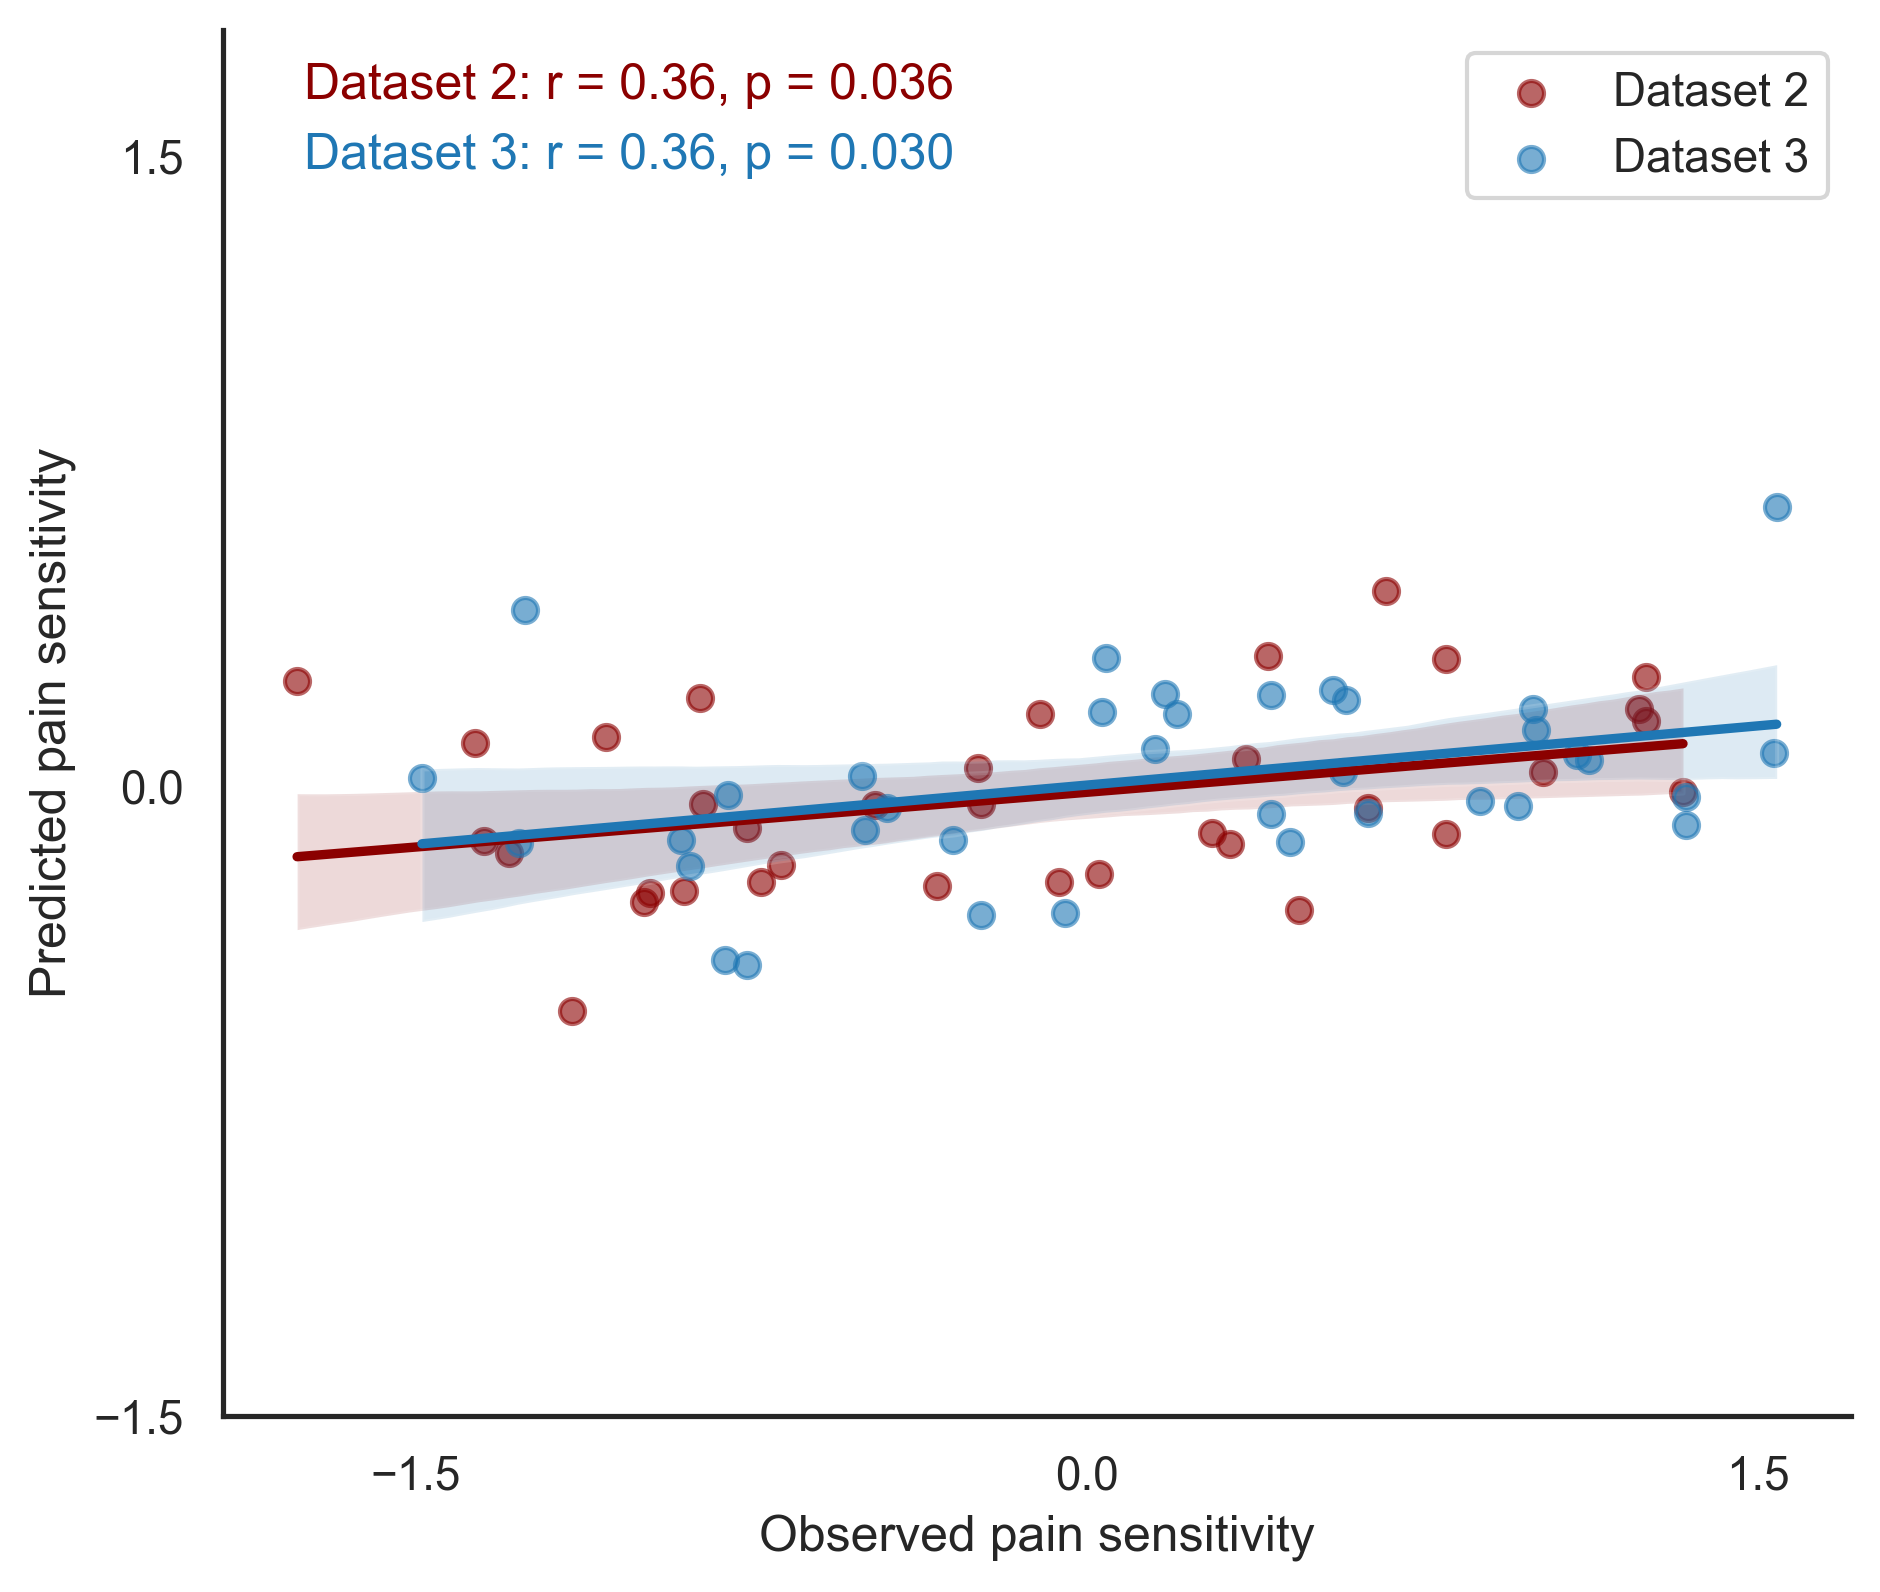

In [14]:
# M4
xd2 = np.load(f'/home/lxm/lxm/post_braincord/scripts/5post_stats/1_all_analysis/validation_b_bs/final/M4_xd2.npy',)
yd2 = np.load(f'/home/lxm/lxm/post_braincord/scripts/5post_stats/1_all_analysis/validation_b_bs/final/M4_yd2.npy',)
xd3 = np.load(f'/home/lxm/lxm/post_braincord/scripts/5post_stats/1_all_analysis/validation_b_bs/final/M4_xd3.npy',)
yd3 = np.load(f'/home/lxm/lxm/post_braincord/scripts/5post_stats/1_all_analysis/validation_b_bs/final/M4_yd3.npy')
plot_d2d3(xd2,yd2,xd3,yd3)

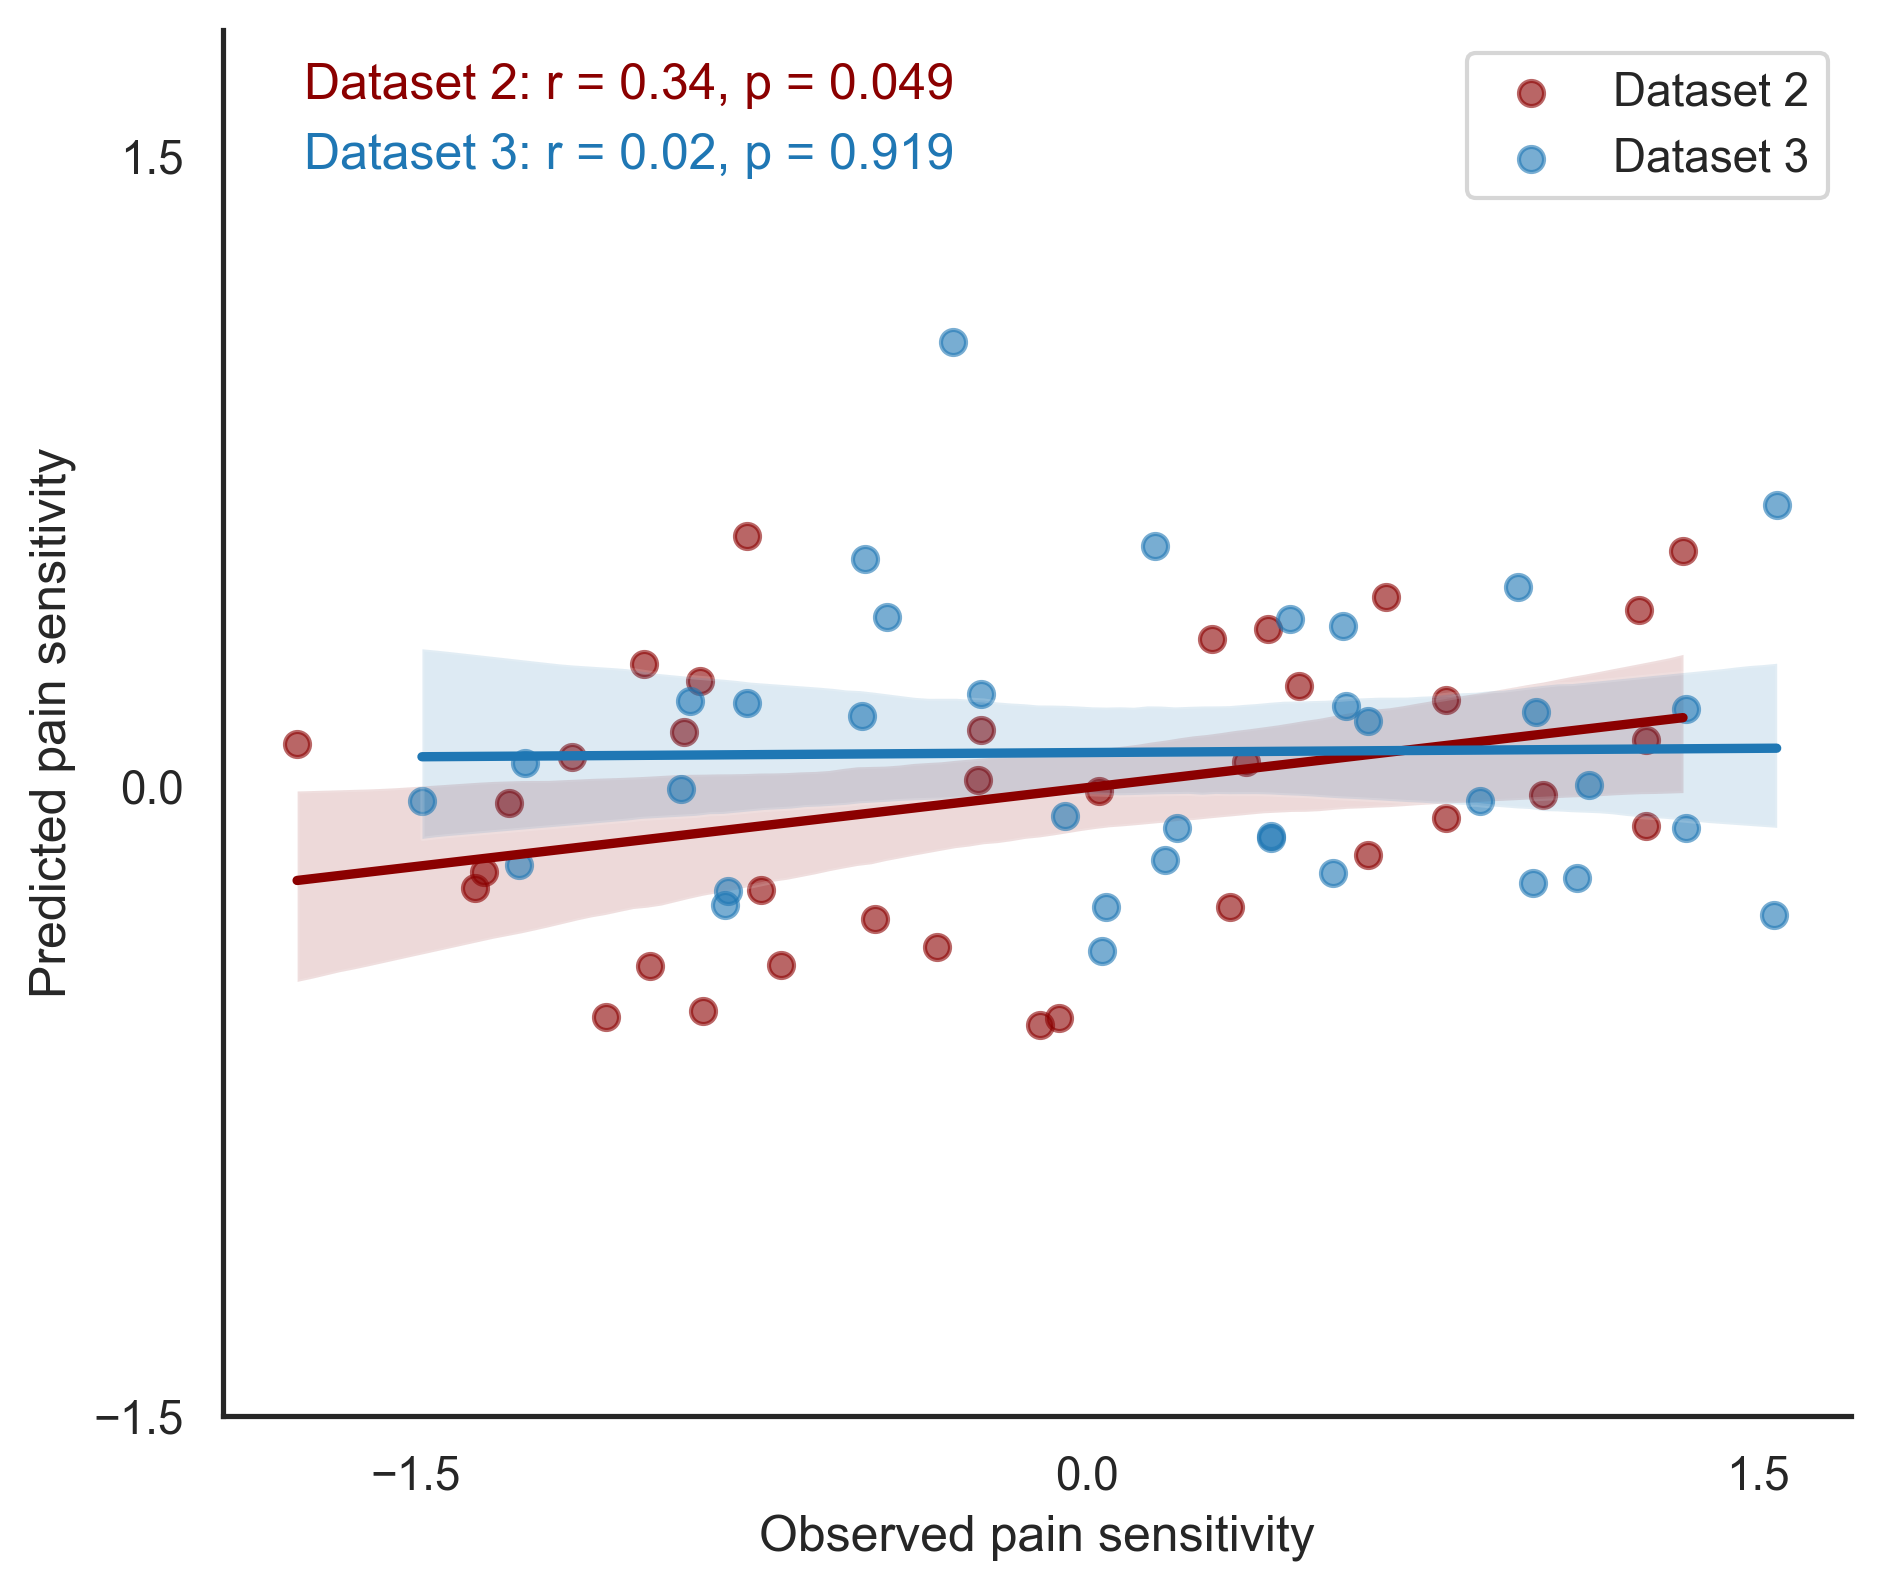

In [15]:
# M5
xd2 = np.load(f'/home/lxm/lxm/post_braincord/scripts/5post_stats/1_all_analysis/validation_b_bs/final/M5_xd2.npy',)
yd2 = np.load(f'/home/lxm/lxm/post_braincord/scripts/5post_stats/1_all_analysis/validation_b_bs/final/M5_yd2.npy',)
xd3 = np.load(f'/home/lxm/lxm/post_braincord/scripts/5post_stats/1_all_analysis/validation_b_bs/final/M5_xd3.npy',)
yd3 = np.load(f'/home/lxm/lxm/post_braincord/scripts/5post_stats/1_all_analysis/validation_b_bs/final/M5_yd3.npy')
plot_d2d3(xd2,yd2,xd3,yd3)

